In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.dpi'] = 600
dpi = 600

---

### Part-2 1.0

In [230]:
def plot_part2(our_res, tra_res, plot_type="box"):
    topk = ["50", '100', '500', '1000']
    
    our_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(our_res["recall@" + k]):
            our_merged_res.loc[start+ind] = ["Ours", k, recall, our_res["HLA"][ind]]
        start = start + ind + 1
    
    tra_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(tra_res["recall@" + k]):
            tra_merged_res.loc[start+ind] = ["TransPHLA", k, recall, tra_res["HLA"][ind]]
        start = start + ind + 1

    all_merged_res = pd.concat((tra_merged_res, our_merged_res), axis=0)

    all_cated_res = pd.merge(tra_merged_res, our_merged_res, on = ["HLA", "k"])
    all_cated_res["Gain"] = all_cated_res["Recall_y"] - all_cated_res["Recall_x"]
    all_HLAs = list(all_cated_res["HLA"].unique())
    all_cated_res.to_csv("gain.csv")

    if plot_type == "box":
        g = sns.boxplot(data=all_cated_res, x="k", y="Gain",
                        palette="vlag", dodge=False, showcaps=True,
                        width=0.6, fliersize=8, whis=1.5, linewidth=1,
                        flierprops={"marker": "+"}, medianprops={"color": "black"})
        plt.ylabel("Gain of Recall@K", fontsize=12)
    elif plot_type == "swarm":
        HLA_genes = ["HLA-A", "HLA-B", "HLA-C", "HLA-E", "HLA-G"]
        colors = ['#C12B1B', '#008800', "#7E1BC1", '#008800', "#7E1BC1"]
        for ind, HLA_gene in enumerate(HLA_genes):
            # select hla
            HLAs = list(filter(lambda x: HLA_gene in x, all_HLAs))
            if len(HLAs)>0:
                cated_res = all_cated_res[all_cated_res["HLA"].isin(HLAs)]
                # one gene, one palette
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [colors[ind], "white"])
                matplotlib.cm.register_cmap("mycolormap", cmap)
                cpal = sns.color_palette("mycolormap", n_colors=len(HLAs), desat=0.9)
                g = sns.swarmplot(data=cated_res, x="k", y="Gain", hue="HLA",
                                palette=cpal, dodge=False,
                                edgecolor='black', linewidth=0.5, size=4)
        sns.move_legend(
            g, "lower center", fontsize=9,
            bbox_to_anchor=(1.15, 0.0), ncol=1, title="HLA Allele", frameon=False,      # 0.37
            labelspacing=0.7, title_fontsize=10.5
        )
        plt.ylabel("Gain of Recall@K", fontsize=12)
    elif plot_type == "violin":
        # sns.boxplot(data=all_merged_res, x="k", y="Recall", hue="model",
        #             palette="vlag", dodge=True, showcaps=False,
        #             width=0.7, fliersize=0, whis=0, linewidth=1,
        #             medianprops={"color": "black"})
        g = sns.violinplot(data=all_merged_res, x="k", y="Recall", hue="model",
                           palette= "pastel", scale='width', inner="stick", split=True, 
                           linewidth=0.08, saturation=0.75,
                           cut=0,
                           bw=0.18
                           )
        plt.ylabel("Recall@K", fontsize=12)
        # handles, labels = g.get_legend_handles_labels()
        # g.legend(handles=handles[-2:], labels=labels[-2:])
        sns.move_legend(
            g, "lower center",
            bbox_to_anchor=(0.48, -0.18), ncol=2, title=None, frameon=False,
        )
    
    plt.xlabel("K", fontsize=12)
    plt.xlim((-1, 4))
    plt.xticks(range(0,4), topk)

In [245]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white"])
matplotlib.cm.register_cmap("mycolormap", cmap)
cpal = sns.color_palette("mycolormap", n_colors=5, desat=0.9)
cpal

/tmp/ipykernel_2980653/3710675135.py:2: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)


[(0.9582352941176471, 0.20647058823529418, 0.20647058823529418),
 (0.9666666666666667, 0.3666666666666666, 0.3666666666666666),
 (0.9750980392156862, 0.5268627450980393, 0.5268627450980393),
 (0.9833333333333334, 0.6833333333333331, 0.6833333333333331),
 (0.9917647058823531, 0.8435294117647059, 0.8435294117647059)]

/tmp/ipykernel_2980653/3292663348.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)
/tmp/ipykernel_2980653/3292663348.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)
/tmp/ipykernel_2980653/3292663348.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)


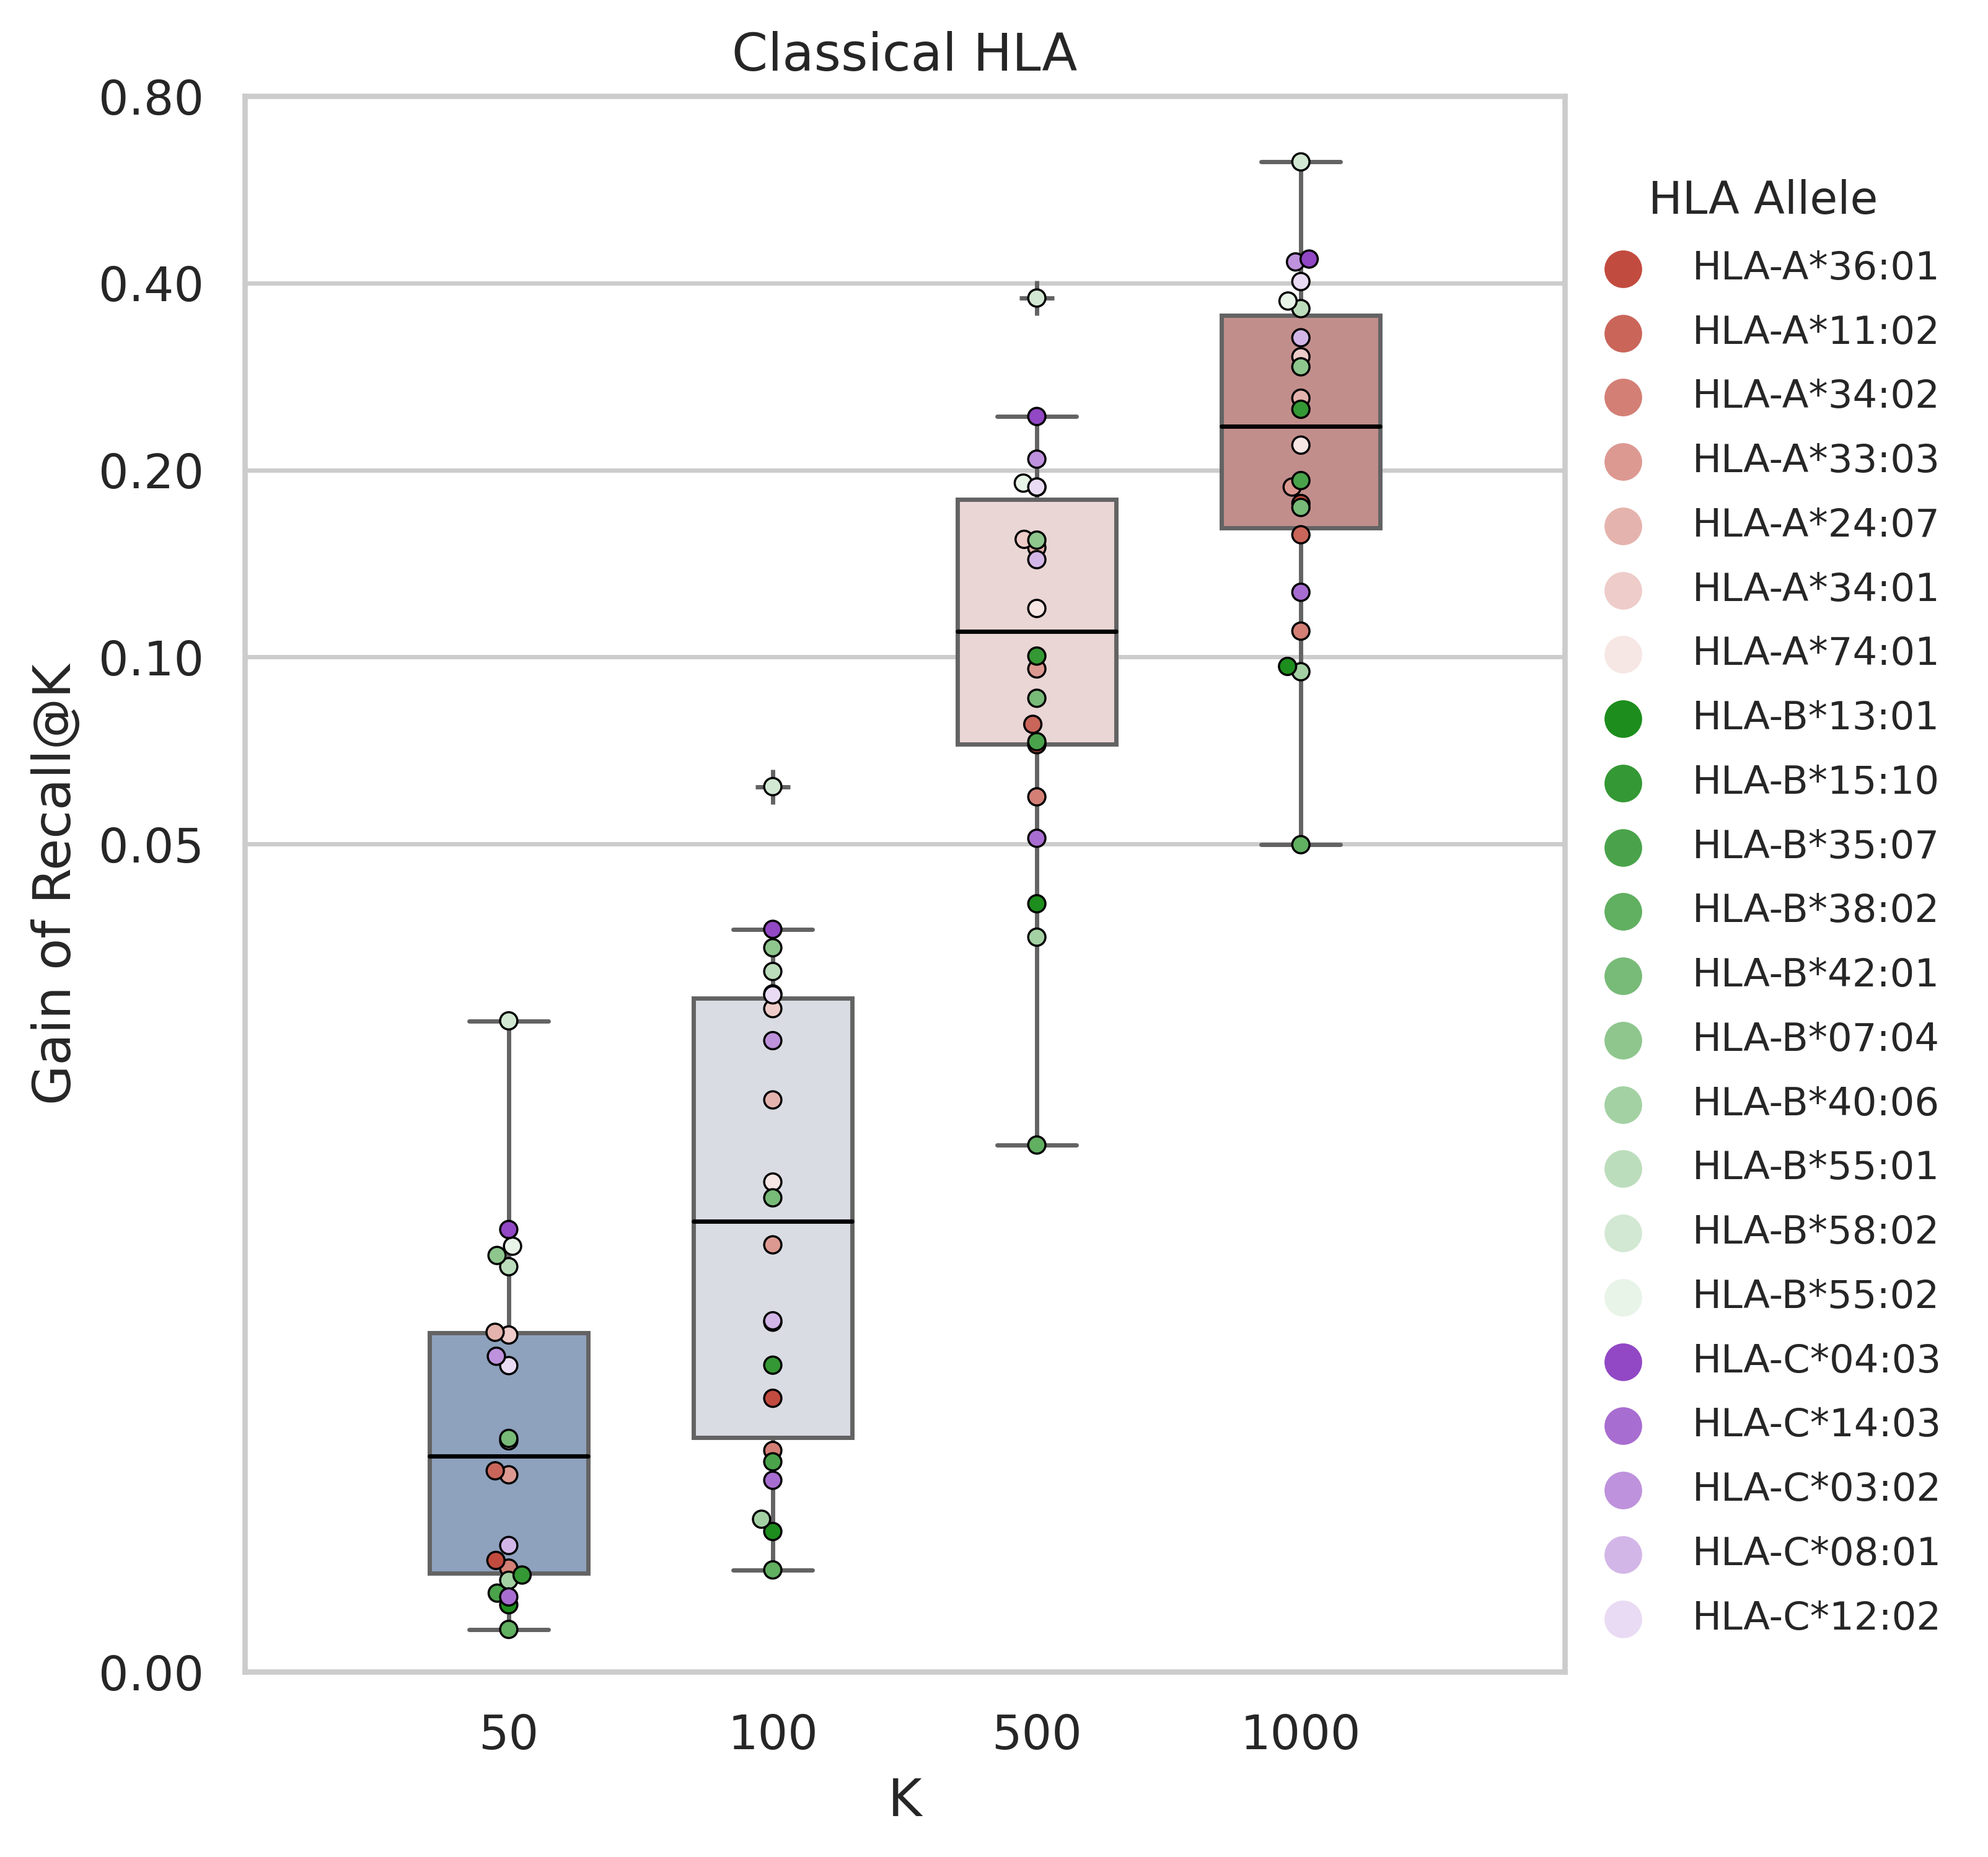

In [231]:
titlename = "Classical HLA"
datapath = "../fullranking_csvs/zeroshot_abc/"
our_res = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
tra_res = pd.read_csv(datapath + "TransPHLA/34mer_original_TransPHLA.csv", index_col=0)

from matplotlib.ticker import ScalarFormatter, FixedLocator
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (6.5, 6)

fig, ax = plt.subplots(1,1)
ax.set_yscale('symlog', linthresh=0.03)
ax.yaxis.set_major_locator(FixedLocator([0.00,0.05,0.10,0.20,0.40,0.80]))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylim((0,0.8))

plot_part2(our_res, tra_res, plot_type="box")
plot_part2(our_res, tra_res, plot_type="swarm")

plt.title(titlename)
plt.tight_layout(pad=0.5)
plt.savefig("./pngs_final/part2_box{}_dpi500.png".format(1), dpi=500, bbox_inches='tight')

/tmp/ipykernel_2980653/2034950696.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)
/tmp/ipykernel_2980653/2034950696.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)


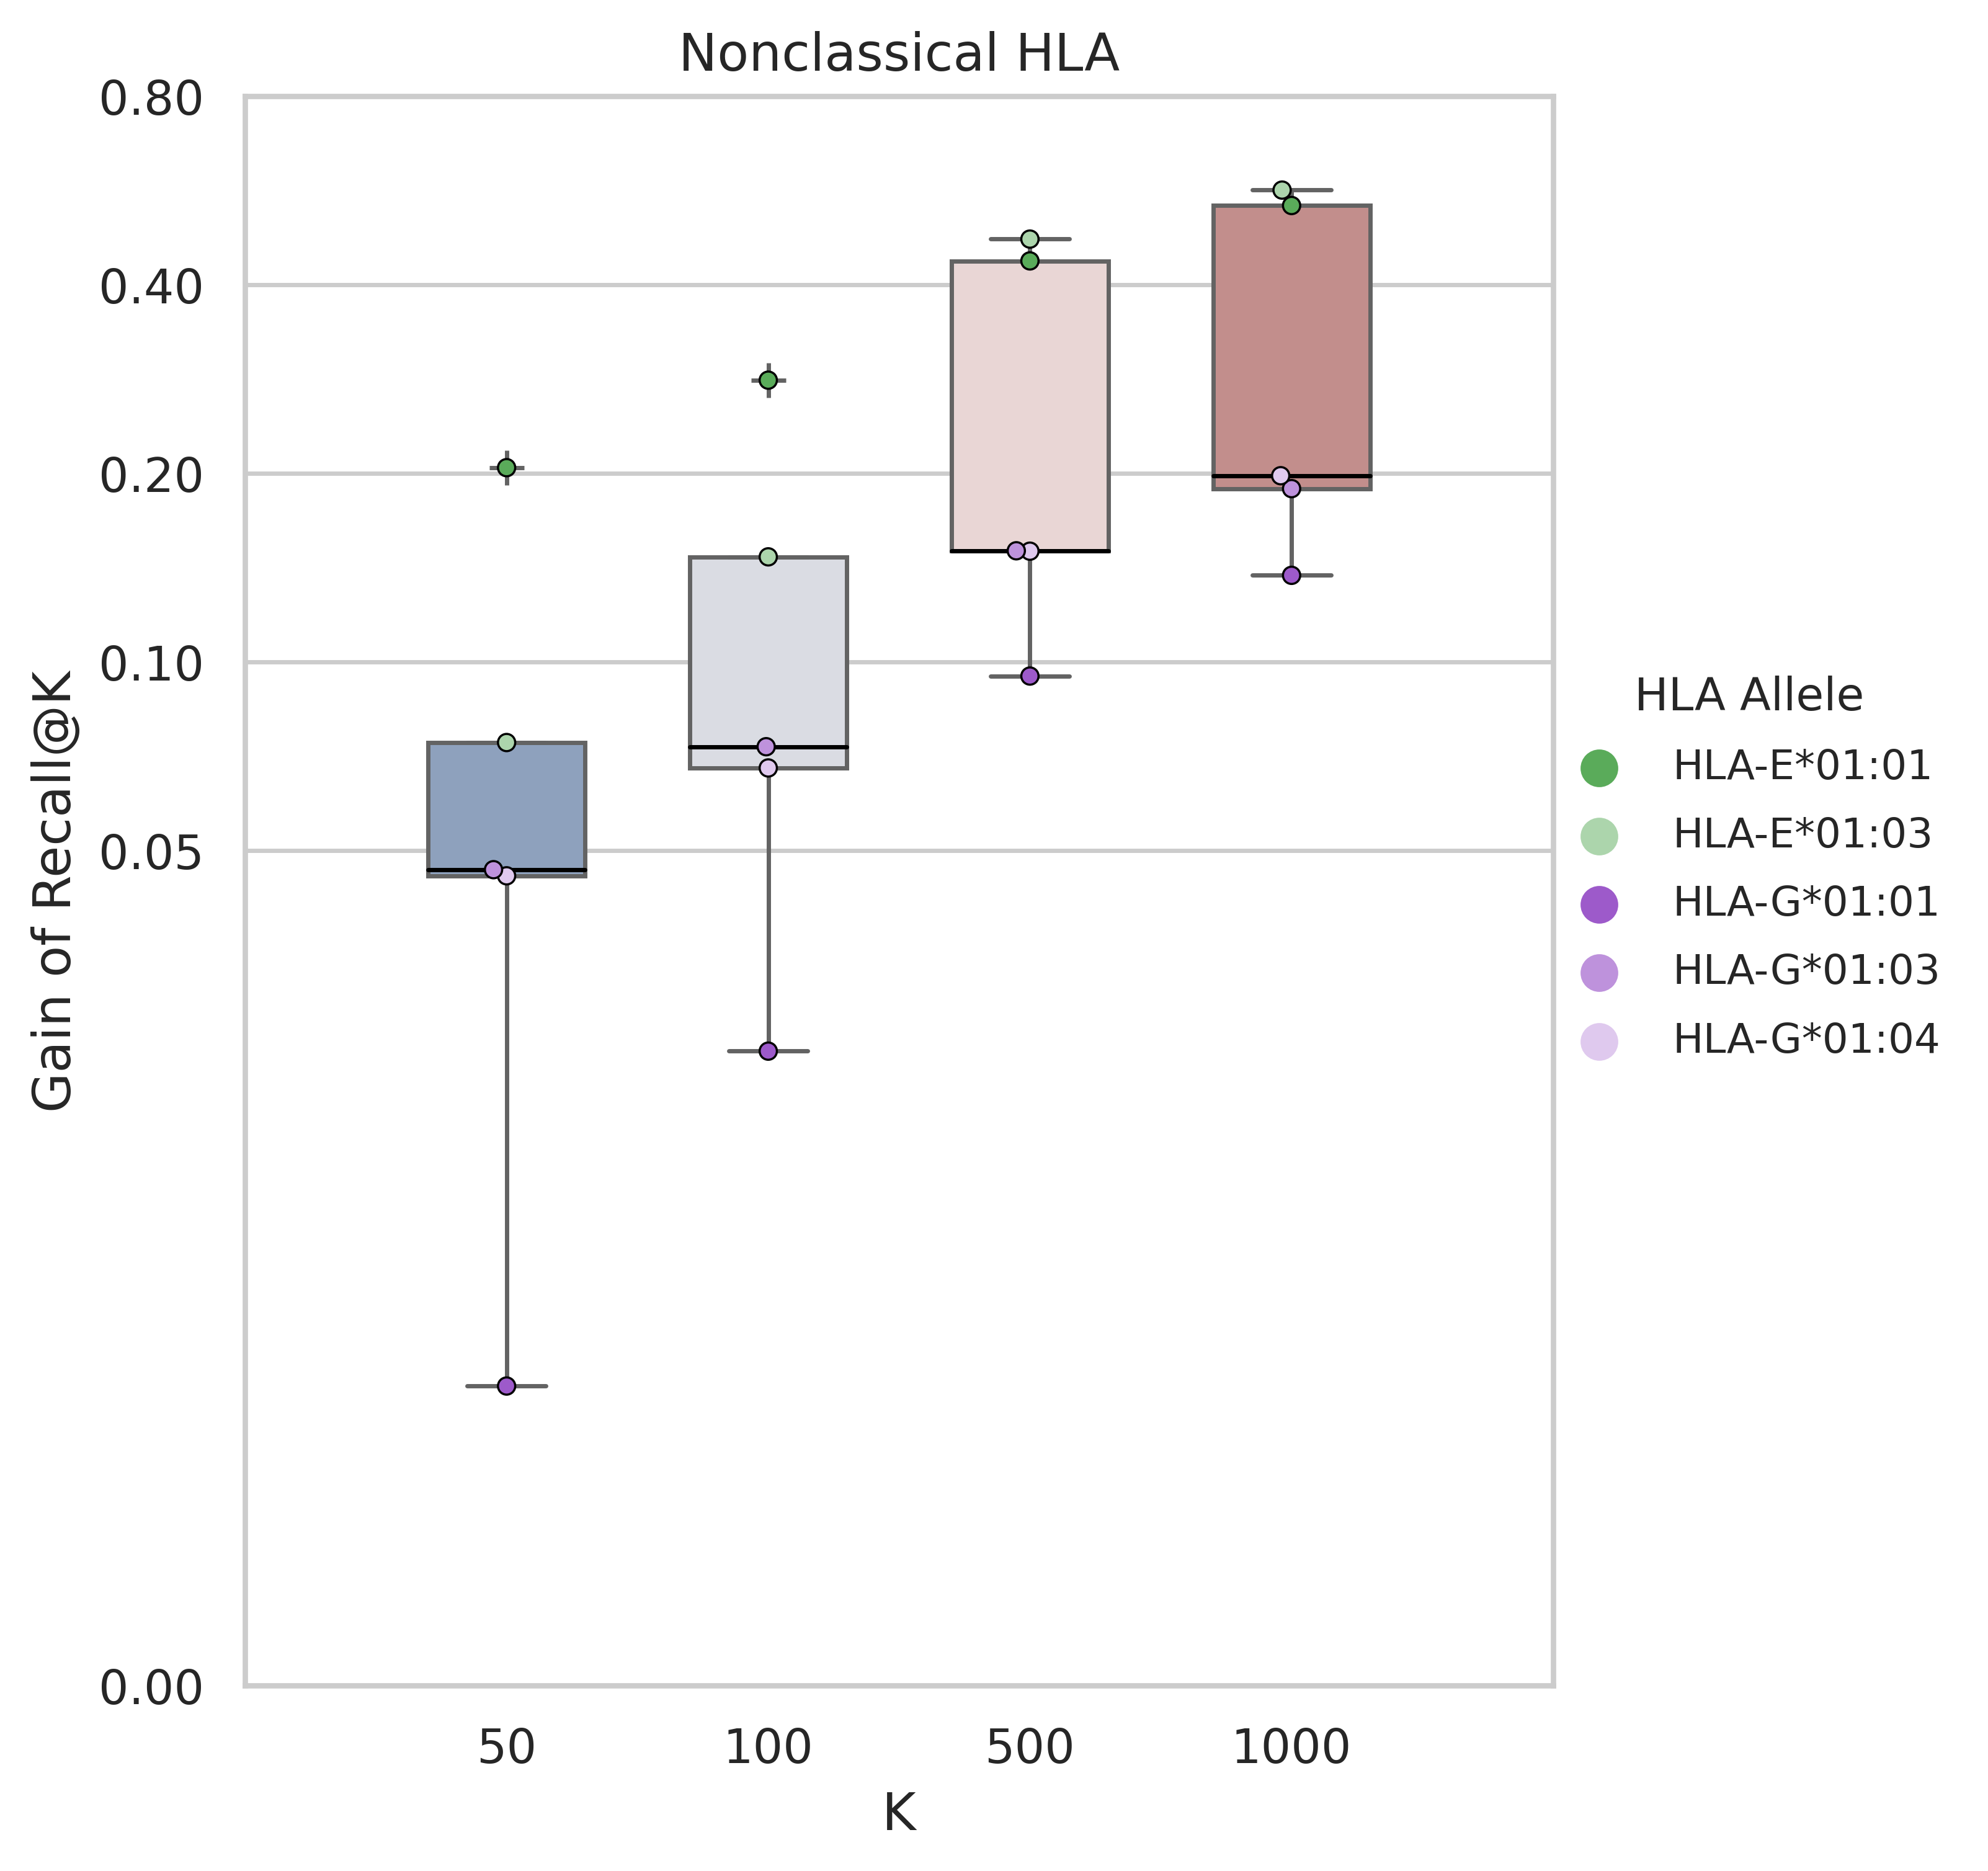

In [226]:
titlename = "Nonclassical HLA"
datapath = "../fullranking_csvs/zeroshot_eg/"
our_res = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
tra_res = pd.read_csv(datapath + "TransPHLA/34mer_original_TransPHLA.csv", index_col=0)

from matplotlib.ticker import ScalarFormatter, FixedLocator
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (6.5, 6)

fig, ax = plt.subplots(1,1)
ax.set_yscale('symlog', linthresh=0.03)
ax.yaxis.set_major_locator(FixedLocator([0.00,0.05,0.10,0.20,0.40,0.80]))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylim((0,0.8))

plot_part2(our_res, tra_res, plot_type="box")
plot_part2(our_res, tra_res, plot_type="swarm")

plt.title(titlename)
plt.tight_layout(pad=0.5)
plt.savefig("./pngs_final/part2_box{}_dpi500.png".format(2), dpi=500, bbox_inches='tight')

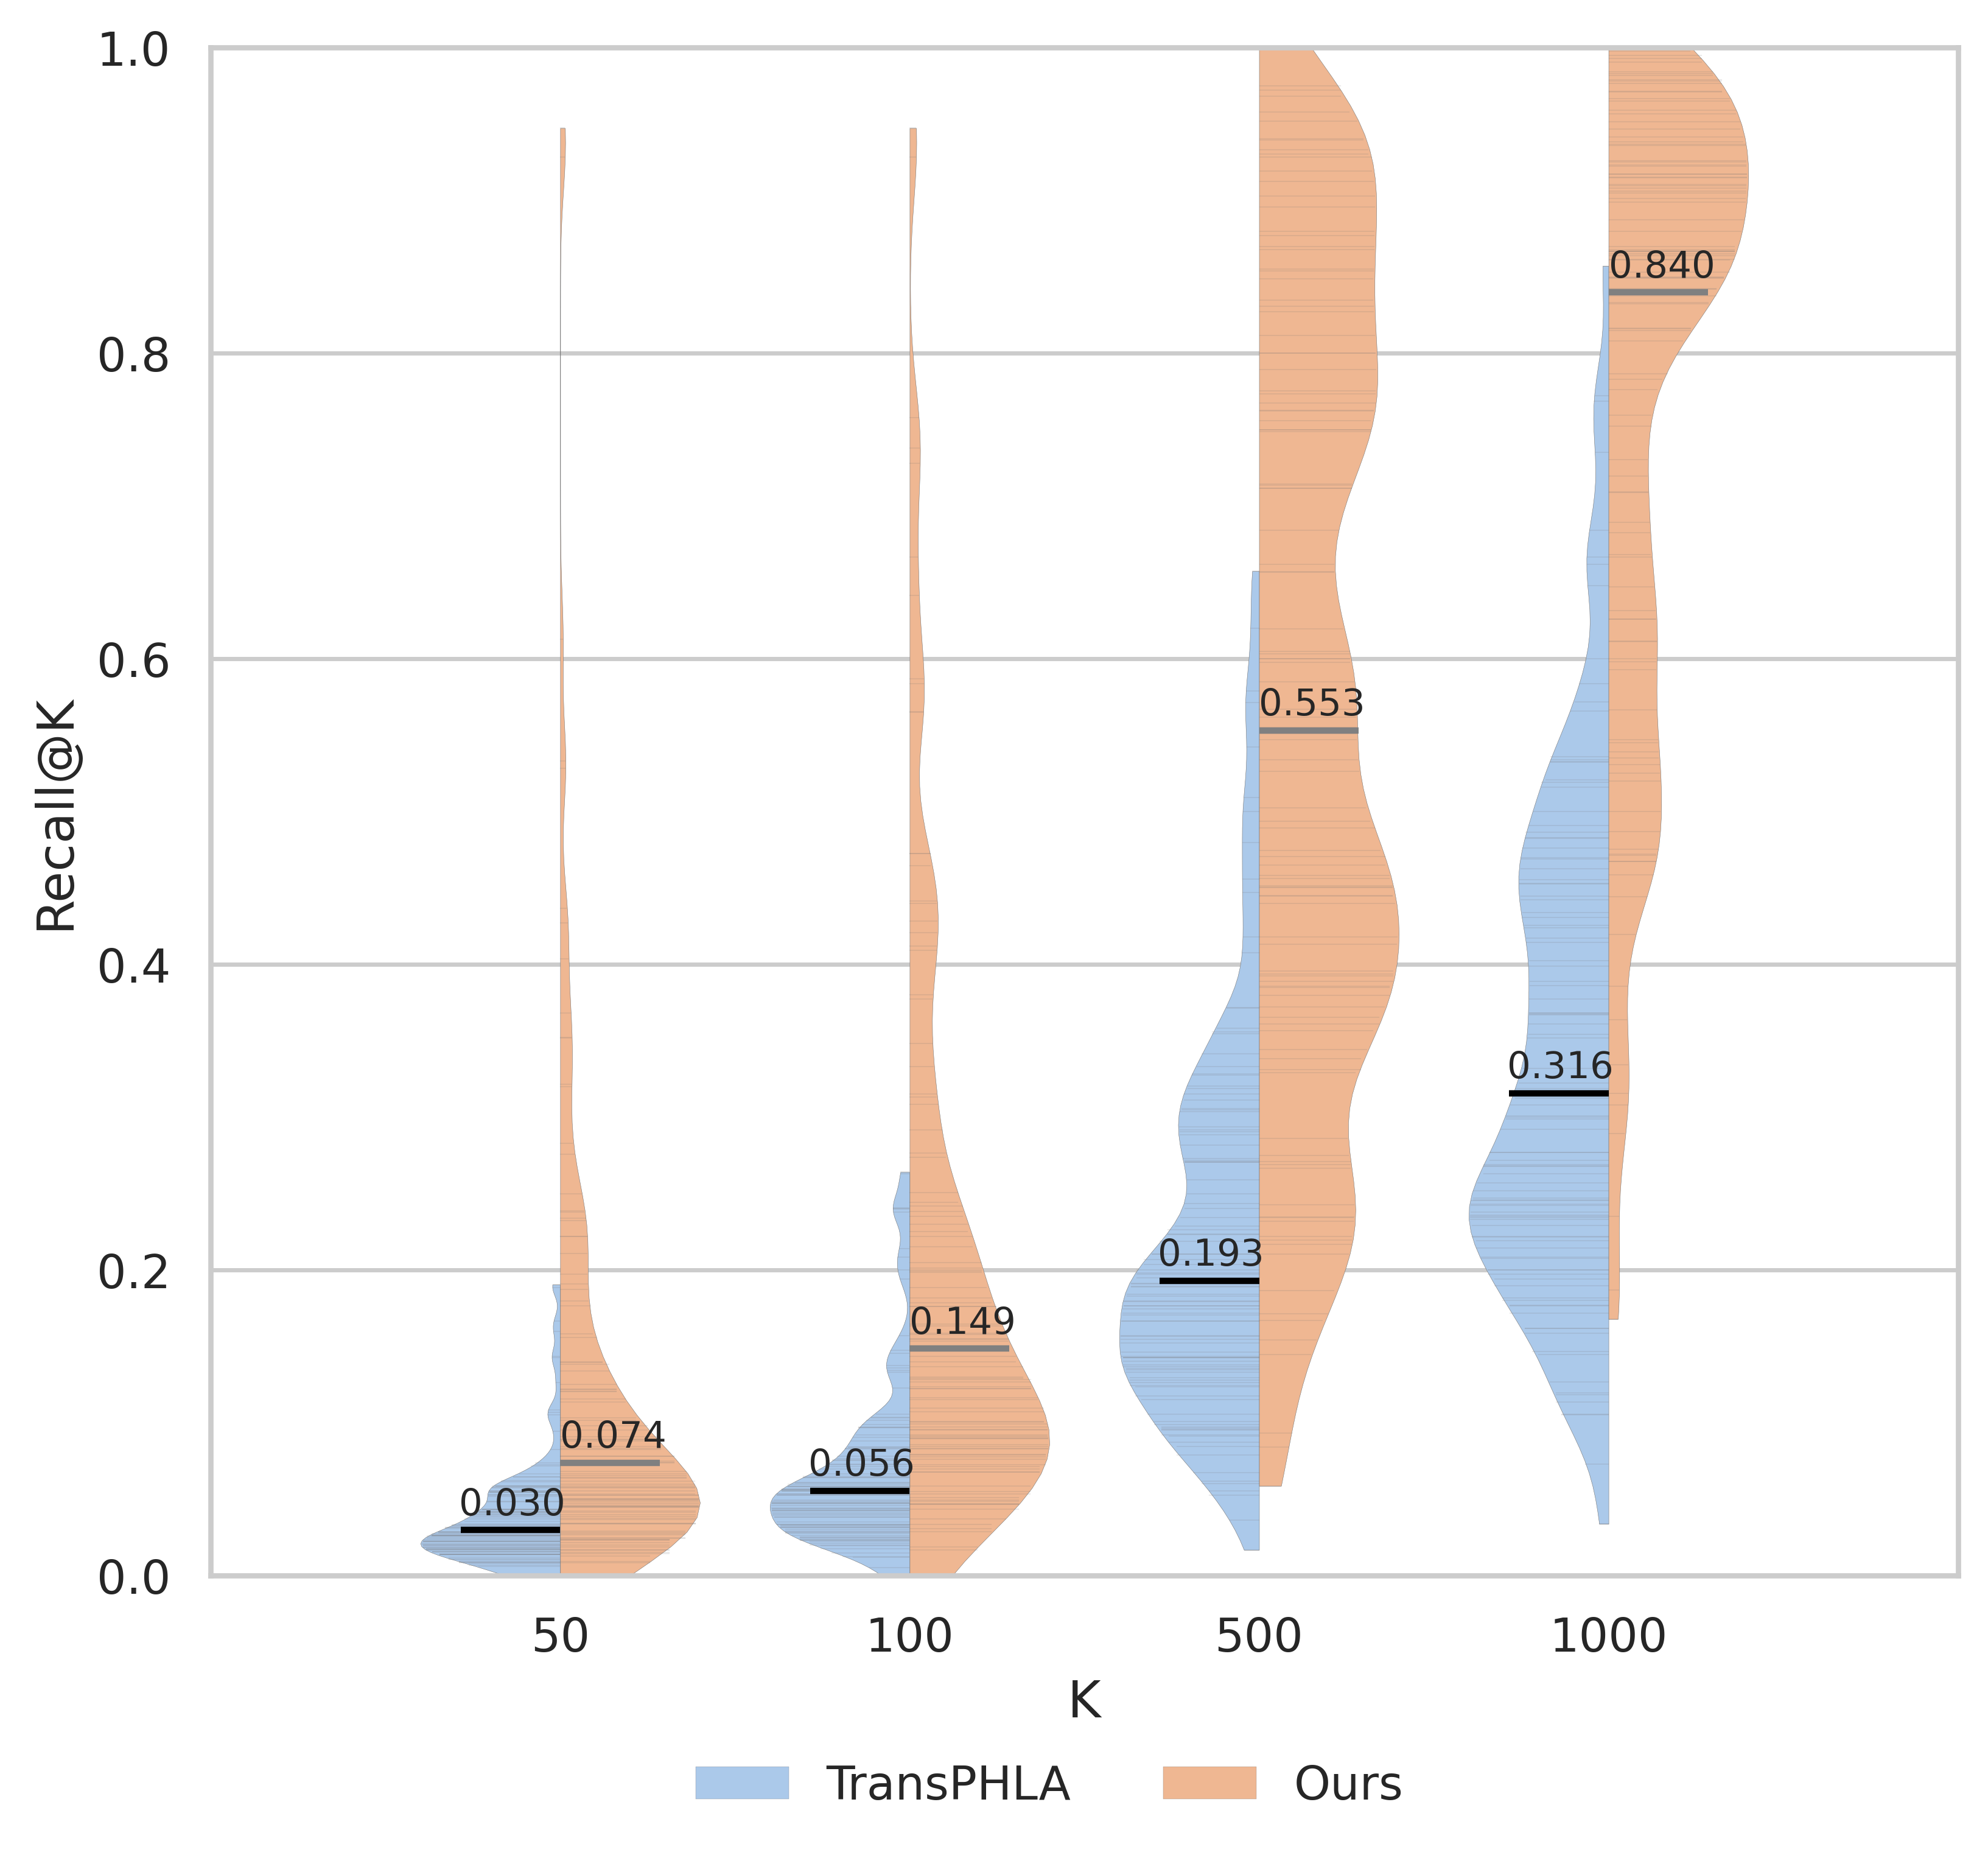

In [201]:
datapath = "../fullranking_csvs/test/"
our_res = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
tra_res = pd.read_csv(datapath + "TransPHLA/34mer_original_TransPHLA.csv", index_col=0)

our_median = list(our_res.median(numeric_only=True))[:4]
tra_median = list(tra_res.median(numeric_only=True))[:4]

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (6.5, 6)

fig, ax = plt.subplots(1,1)
# from matplotlib.ticker import ScalarFormatter, FixedLocator
# ax.set_yscale('symlog', linthresh=0.03)
# ax.yaxis.set_major_locator(FixedLocator([0.00,0.05,0.10,0.20,0.40,0.80]))
# ax.yaxis.set_major_formatter(ScalarFormatter())

plot_part2(our_res, tra_res, plot_type="violin")

ax.set_ylim((-0.,1.))
median_width = 0.285
for ind, (tra_med, our_med) in enumerate(zip(tra_median, our_median)):
    ax.hlines(tra_med, ind-median_width, ind, colors="black", linestyles='solid')
    ax.hlines(our_med, ind, ind+median_width, colors="gray", linestyles='solid')
    ax.text(ind-0.29, tra_med+0.01, "{:.3f}".format(tra_med), fontsize=8.8)
    ax.text(ind, our_med+0.01, "{:.3f}".format(our_med), fontsize=8.8)

plt.tight_layout(pad=0.5)
plt.savefig("./pngs_final/part2_{}.png".format(4), dpi=500, bbox_inches='tight')

### Part-2 2.0

In [34]:
def plot_part2_zeroshot1(our_res, tra_res, plot_type="box"):
    topk = ["50", '100', '500', '1000']
    
    our_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(our_res["recall@" + k]):
            our_merged_res.loc[start+ind] = ["Ours", k, recall, our_res["HLA"][ind][4:]]    # HLA-A*01:01->*01:01
        start = start + ind + 1
    
    tra_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(tra_res["recall@" + k]):
            tra_merged_res.loc[start+ind] = ["TransPHLA", k, recall, tra_res["HLA"][ind][4:]]
        start = start + ind + 1
        
    all_cated_res = pd.merge(tra_merged_res, our_merged_res, on = ["HLA", "k"])
    all_cated_res["Gain"] = all_cated_res["Recall_y"] - all_cated_res["Recall_x"]
    all_HLAs = list(all_cated_res["HLA"].unique())
    all_cated_res.to_csv("gain.csv")

    if plot_type == "box":
        g = sns.boxplot(data=all_cated_res, x="k", y="Gain",
                        palette="vlag", dodge=False, showcaps=True,
                        width=0.4, fliersize=12, whis=2, linewidth=2.3,
                        flierprops={"marker": "+"},
                        # medianprops={"color": "black"},
                        boxprops={"facecolor": "none"})
        plt.ylabel("Gain of Recall@K", fontsize=12)
    elif plot_type == "line":
        HLA_genes = ["A*", "B*", "C*", "E*", "G*"]
        colors = ['#C12B1B', '#008800', "#7E1BC1", '#008800', "#7E1BC1"]
        for ind, HLA_gene in enumerate(HLA_genes):
            # select hla
            HLAs = list(filter(lambda x: HLA_gene in x, all_HLAs))
            if len(HLAs)>0:
                cated_res = all_cated_res[all_cated_res["HLA"].isin(HLAs)]
                # one gene, one palette
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [colors[ind], "white"])
                matplotlib.cm.register_cmap("mycolormap", cmap)
                cpal = sns.color_palette("mycolormap", n_colors=len(HLAs), desat=0.9)
                g = sns.lineplot(data=cated_res, x="k", y="Gain", hue="HLA",
                                palette=cpal, markersize=6.3,
                                linestyle='--', marker="o", alpha=0.7) 
        sns.move_legend(
            g, "lower left", fontsize=11.6,
            bbox_to_anchor=(1.008, -0.09), ncol=1, title="HLA-I allele", frameon=False,        
            labelspacing=0.77, title_fontsize=13, 
            # markerscale=3
        )
        
    plt.xlabel("K", fontsize=15)
    plt.ylabel("Gain of Recall@K", fontsize=15)
    plt.xlim((-0.4, 3.4))
    plt.xticks(range(0,4), topk, fontsize=14)
    plt.yticks(fontsize=14)

/tmp/ipykernel_3959437/2381906027.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)
/tmp/ipykernel_3959437/2381906027.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)


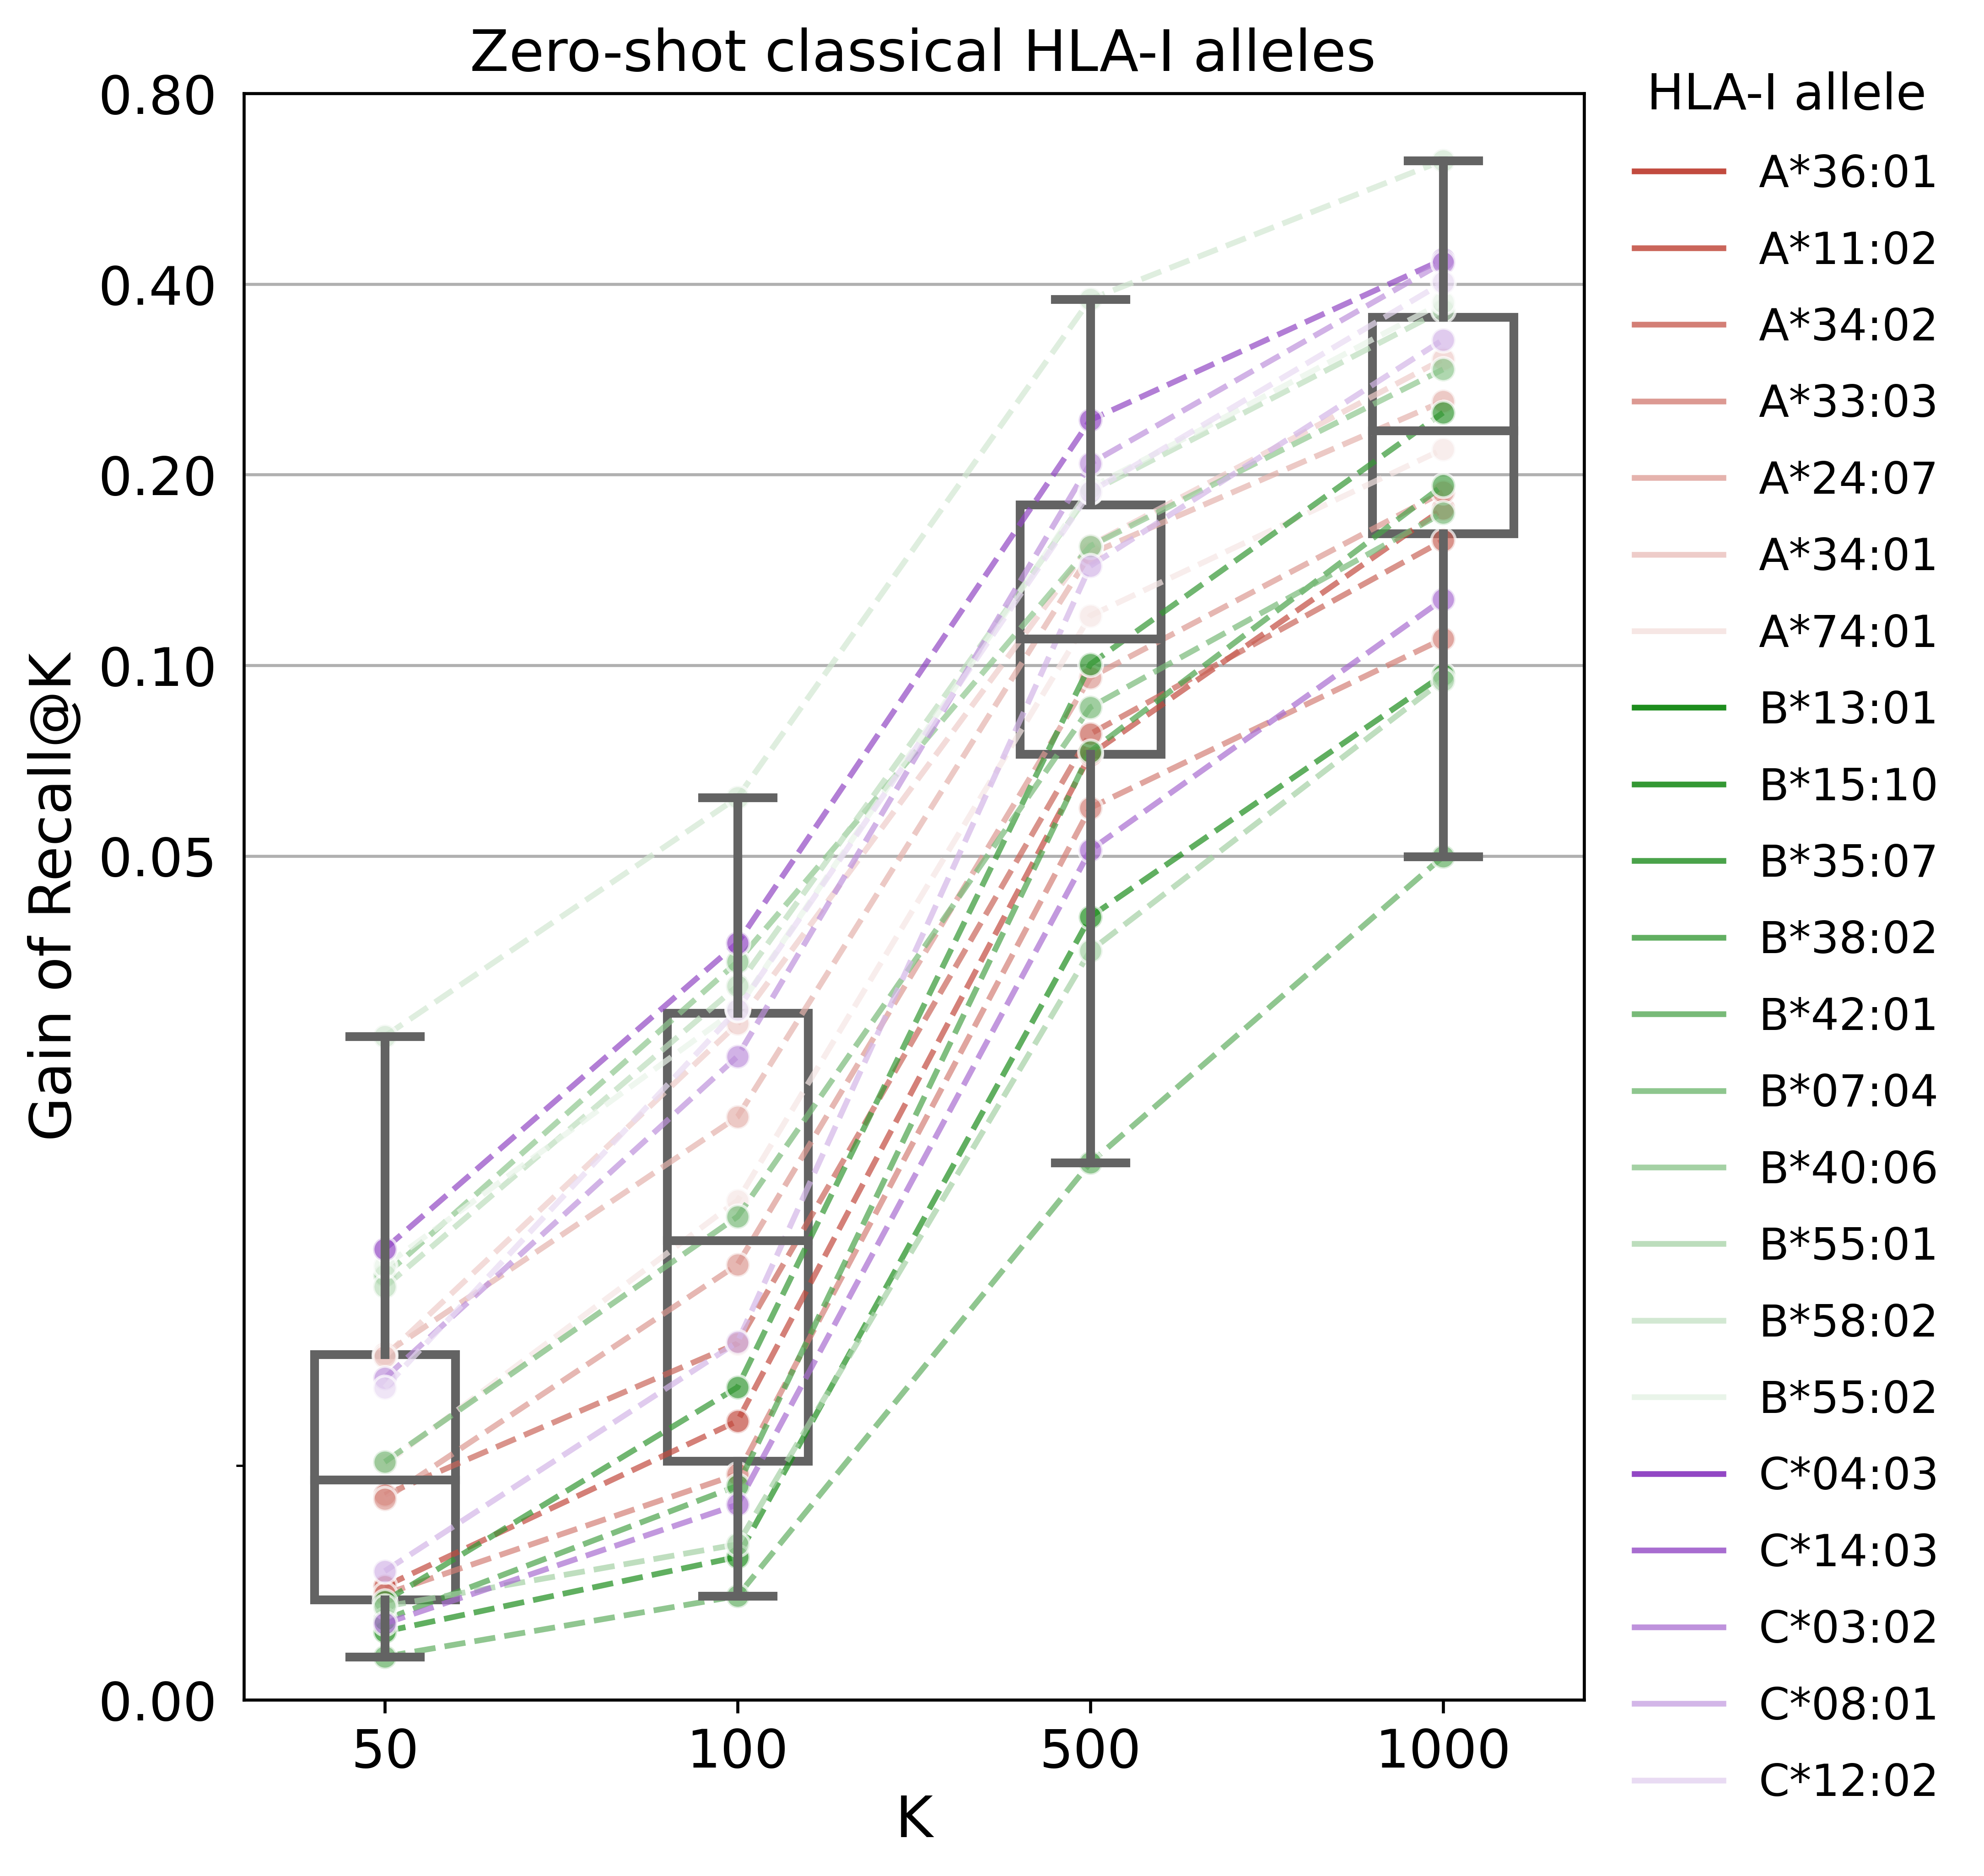

In [35]:
titlename = " Zero-shot classical HLA-I alleles"
datapath = "../fullranking_csvs/zeroshot_abc/"
our_res = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
tra_res = pd.read_csv(datapath + "TransPHLA/34mer_original_TransPHLA.csv", index_col=0)

from matplotlib.ticker import ScalarFormatter, FixedLocator
plt.rcParams['figure.figsize'] = (6.3, 7.6)     # 6.5, 7.2

fig, ax = plt.subplots(1,1)
ax.set_yscale('symlog', linthresh=0.03)
ax.yaxis.set_major_locator(FixedLocator([0.00,0.05,0.10,0.20,0.40,0.80]))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylim((0,0.8))
ax.tick_params(bottom=True, left=False, direction='out')
ax.grid(which='major', axis='y')

plot_part2_zeroshot1(our_res, tra_res, plot_type="line")
plot_part2_zeroshot1(our_res, tra_res, plot_type="box")

plt.rc('axes', axisbelow=True)
plt.title(titlename, fontsize=15)
plt.savefig("./pngs_final3/part3_box{}.png".format(1), dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-2_1.svg", format='svg', dpi=dpi, bbox_inches='tight')

In [36]:
def plot_part2_zeroshot2(our_res, tra_res, plot_type="box"):
    topk = ["50", '100', '500', '1000']
    
    our_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(our_res["recall@" + k]):
            our_merged_res.loc[start+ind] = ["Ours", k, recall, our_res["HLA"][ind][4:]]    # HLA-A*01:01->*01:01
        start = start + ind + 1
    
    tra_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(tra_res["recall@" + k]):
            tra_merged_res.loc[start+ind] = ["TransPHLA", k, recall, tra_res["HLA"][ind][4:]]
        start = start + ind + 1
        
    all_cated_res = pd.merge(tra_merged_res, our_merged_res, on = ["HLA", "k"])
    all_cated_res["Gain"] = all_cated_res["Recall_y"] - all_cated_res["Recall_x"]
    all_HLAs = list(all_cated_res["HLA"].unique())
    all_cated_res.to_csv("gain.csv")

    if plot_type == "box":
        g = sns.boxplot(data=all_cated_res, x="k", y="Gain",
                        palette="vlag", dodge=False, showcaps=True,
                        width=0.4, fliersize=12, whis=5, linewidth=2.3,
                        flierprops={"marker": "+"},
                        # medianprops={"color": "black"},
                        boxprops={"facecolor": "none"})
        plt.ylabel("Gain of Recall@K", fontsize=12)
    elif plot_type == "line":
        HLA_genes = ["A*", "B*", "C*", "E*", "G*"]
        colors = ['#C12B1B', '#008800', "#7E1BC1", '#008800', "#7E1BC1"]
        for ind, HLA_gene in enumerate(HLA_genes):
            # select hla
            HLAs = list(filter(lambda x: HLA_gene in x, all_HLAs))
            if len(HLAs)>0:
                cated_res = all_cated_res[all_cated_res["HLA"].isin(HLAs)]
                # one gene, one palette
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [colors[ind], "white"])
                matplotlib.cm.register_cmap("mycolormap", cmap)
                cpal = sns.color_palette("mycolormap", n_colors=len(HLAs), desat=0.9)
                g = sns.lineplot(data=cated_res, x="k", y="Gain", hue="HLA",
                                palette=cpal, markersize=7.5,
                                linestyle='--', marker="o", alpha=0.9)  
        sns.move_legend(
            g, "lower left", fontsize=12.6,
            bbox_to_anchor=(0.64, 0.04), ncol=1, title="HLA-I allele", frameon=False,      
            labelspacing=0.8, title_fontsize=13.6                                   
        )
        
    plt.xlabel("K", fontsize=15)
    plt.ylabel("Gain of Recall@K", fontsize=15)
    plt.xlim((-0.4, 3.4))
    plt.xticks(range(0,4), topk, fontsize=14)
    plt.yticks(fontsize=14)

/tmp/ipykernel_3959437/1633529011.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)
/tmp/ipykernel_3959437/1633529011.py:41: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)


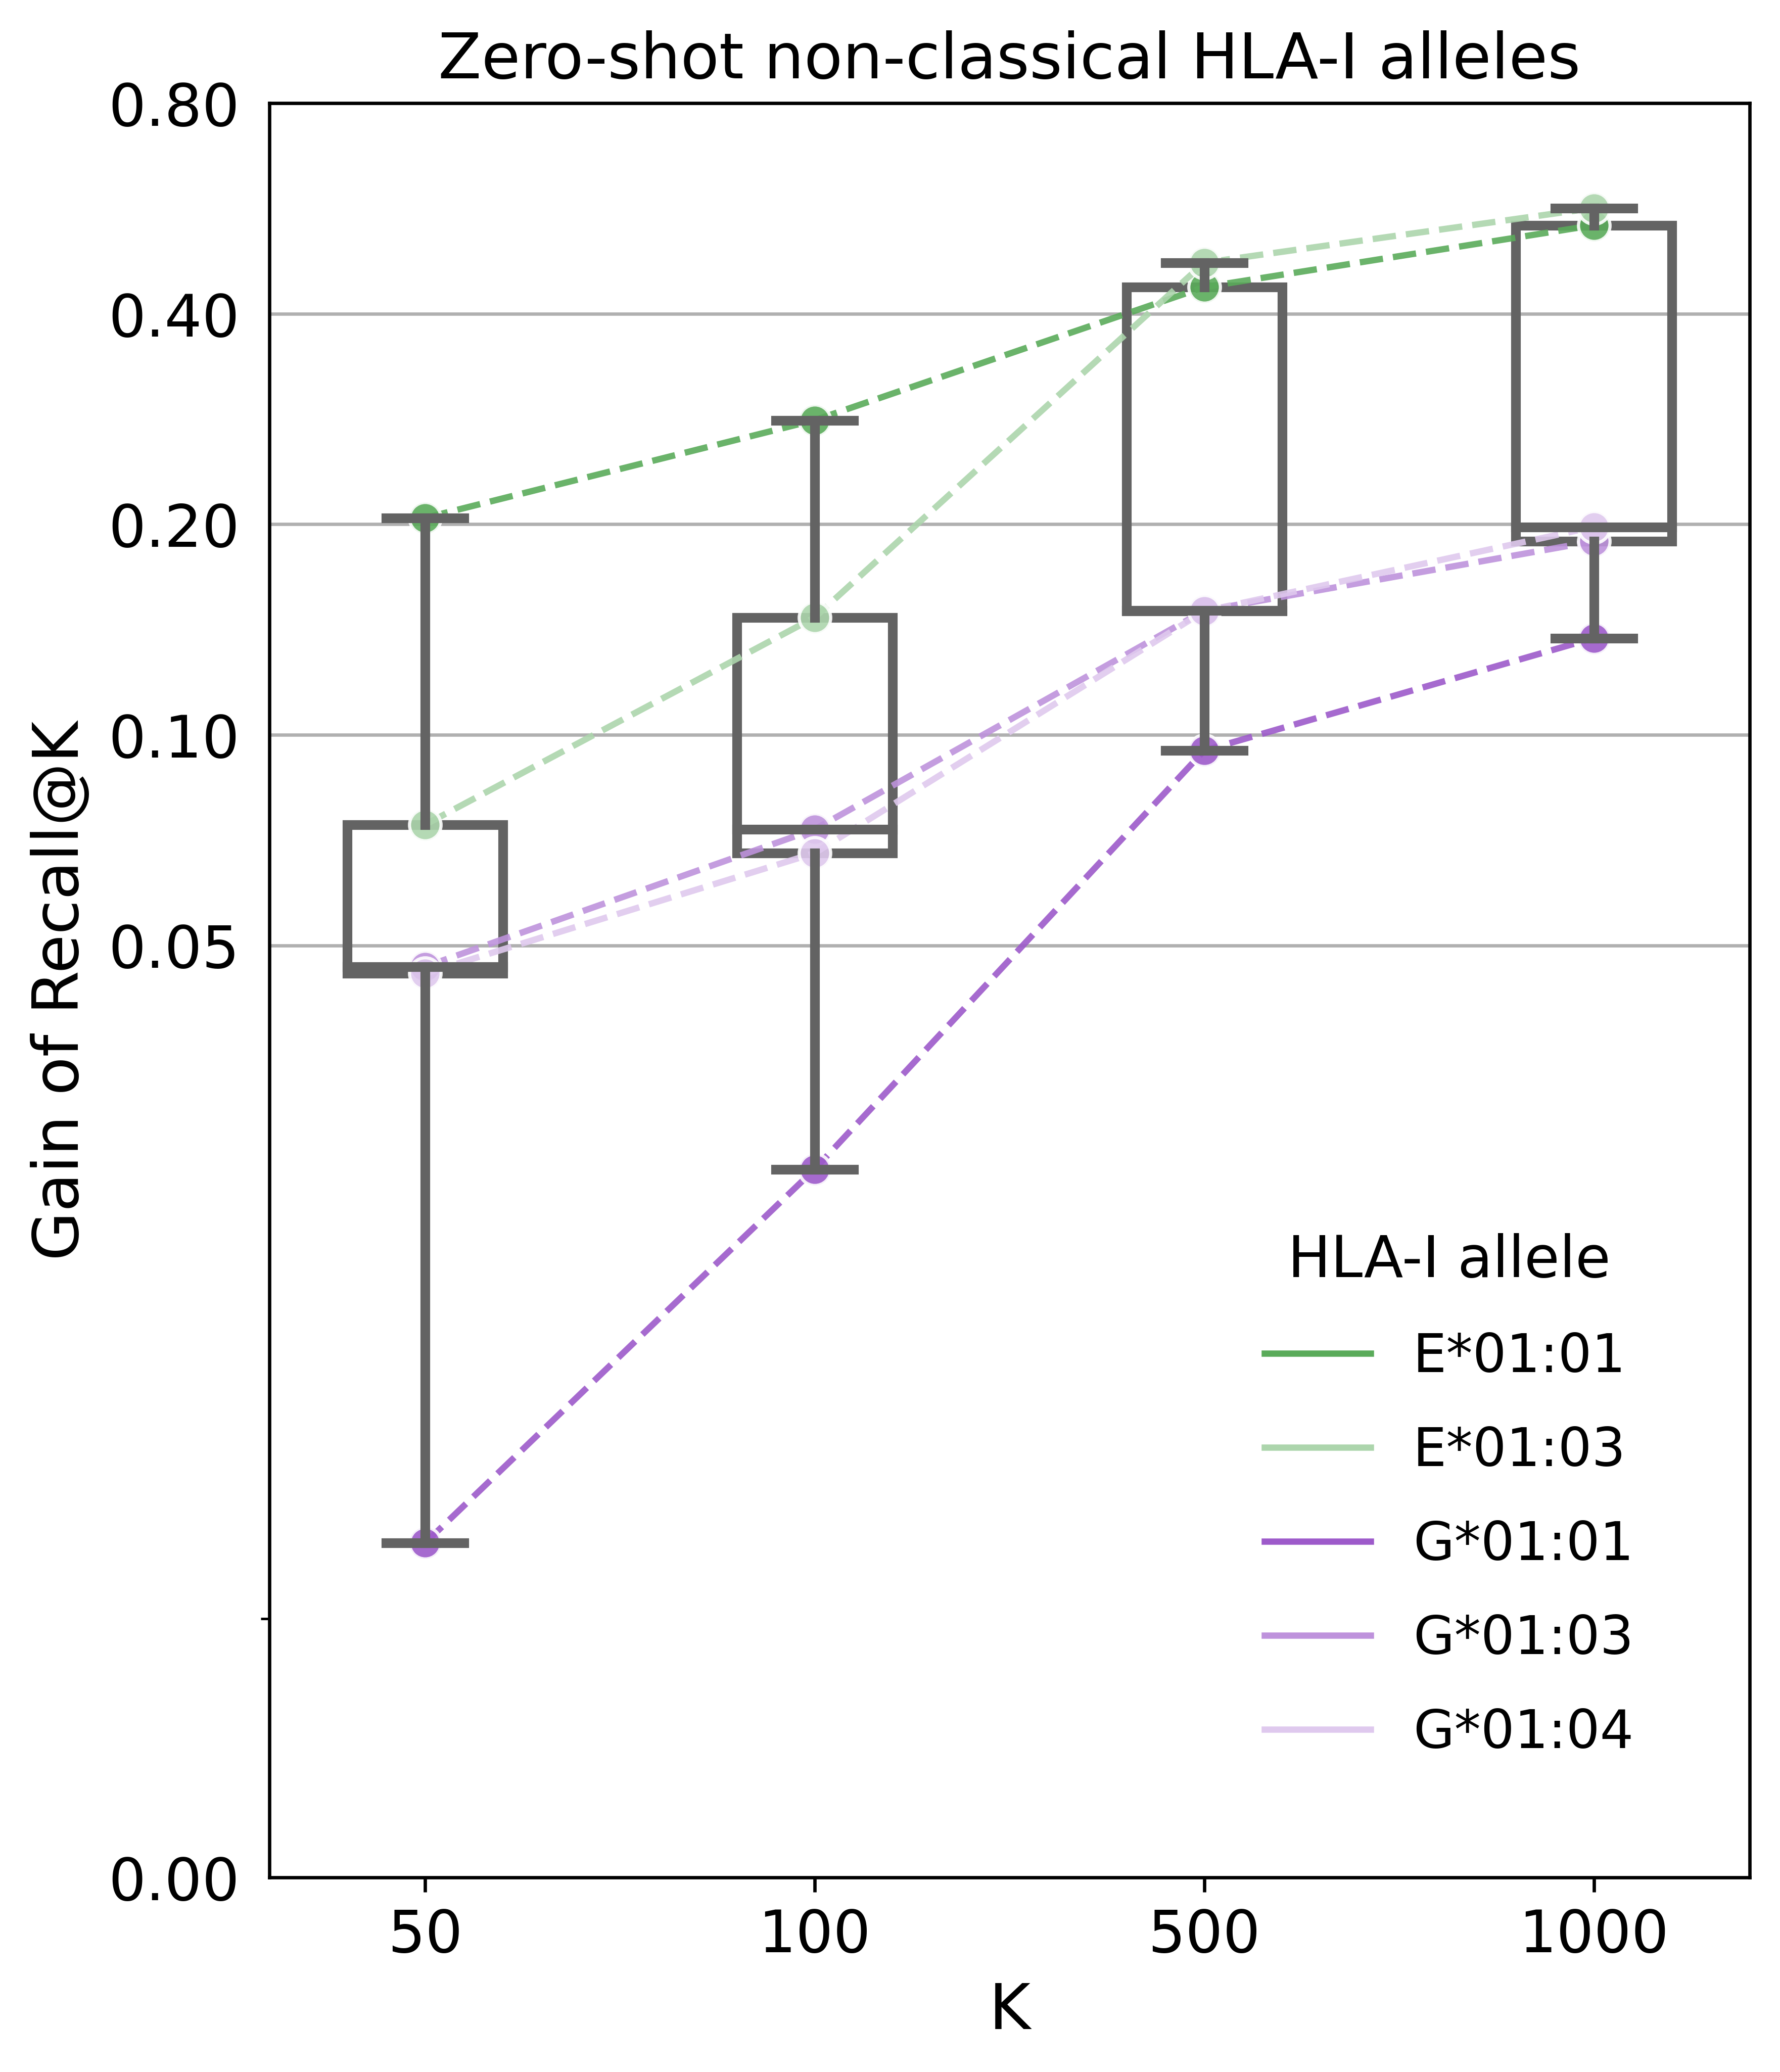

In [37]:
titlename = "Zero-shot non-classical HLA-I alleles"
datapath = "../fullranking_csvs/zeroshot_eg/"
our_res = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
tra_res = pd.read_csv(datapath + "TransPHLA/34mer_original_TransPHLA.csv", index_col=0)

from matplotlib.ticker import ScalarFormatter, FixedLocator
plt.rcParams['figure.figsize'] = (6.3, 7.6)

fig, ax = plt.subplots(1,1)
ax.set_yscale('symlog', linthresh=0.03)
ax.yaxis.set_major_locator(FixedLocator([0.00,0.05,0.10,0.20,0.40,0.80]))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylim((0,0.8))
ax.tick_params(bottom=True, left=False, direction='out')
ax.grid(which='major', axis='y')

plot_part2_zeroshot2(our_res, tra_res, plot_type="line")
plot_part2_zeroshot2(our_res, tra_res, plot_type="box")

plt.rc('axes', axisbelow=True)
plt.title(titlename, fontsize=15)
plt.savefig("./pngs_final3/part3_box{}.png".format(2), dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-2_2.svg", format='svg', dpi=dpi, bbox_inches='tight')

In [7]:
def plot_part2_common(our_res, tra_res, plot_type="violin"):
    topk = ["50", '100', '500', '1000']
    
    our_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(our_res["recall@" + k]):
            our_merged_res.loc[start+ind] = ["HPL-Pan", k, recall, our_res["HLA"][ind]]
        start = start + ind + 1
    
    tra_merged_res = pd.DataFrame(columns=["model","k","Recall","HLA"])
    start = 0
    for k in topk:
        for ind, recall in enumerate(tra_res["recall@" + k]):
            tra_merged_res.loc[start+ind] = ["TransPHLA", k, recall, tra_res["HLA"][ind]]
        start = start + ind + 1

    all_merged_res = pd.concat((tra_merged_res, our_merged_res), axis=0)

    all_cated_res = pd.merge(tra_merged_res, our_merged_res, on = ["HLA", "k"])
    all_cated_res["Gain"] = all_cated_res["Recall_y"] - all_cated_res["Recall_x"]
    all_HLAs = list(all_cated_res["HLA"].unique())
    all_cated_res.to_csv("gain.csv")

    if plot_type == "violin":
        g = sns.violinplot(data=all_merged_res, x="k", y="Recall", hue="model",
                           palette= "pastel", scale='width', inner=None, split=True, 
                           linewidth=0.0, saturation=0.75,
                           cut=0,
                           bw=0.18
                           )
        sns.move_legend(
            g, "lower center", 
            bbox_to_anchor=(0.49, -0.19), ncol=2, title=None, frameon=False,
            columnspacing=5, fontsize=12
        )
    
    plt.xlabel("K", fontsize=13)
    plt.ylabel("Recall@K", fontsize=13)
    plt.xlim((-0.49, 3.49))
    plt.xticks(range(0,4), topk, fontsize=12)
    plt.yticks(fontsize=12)

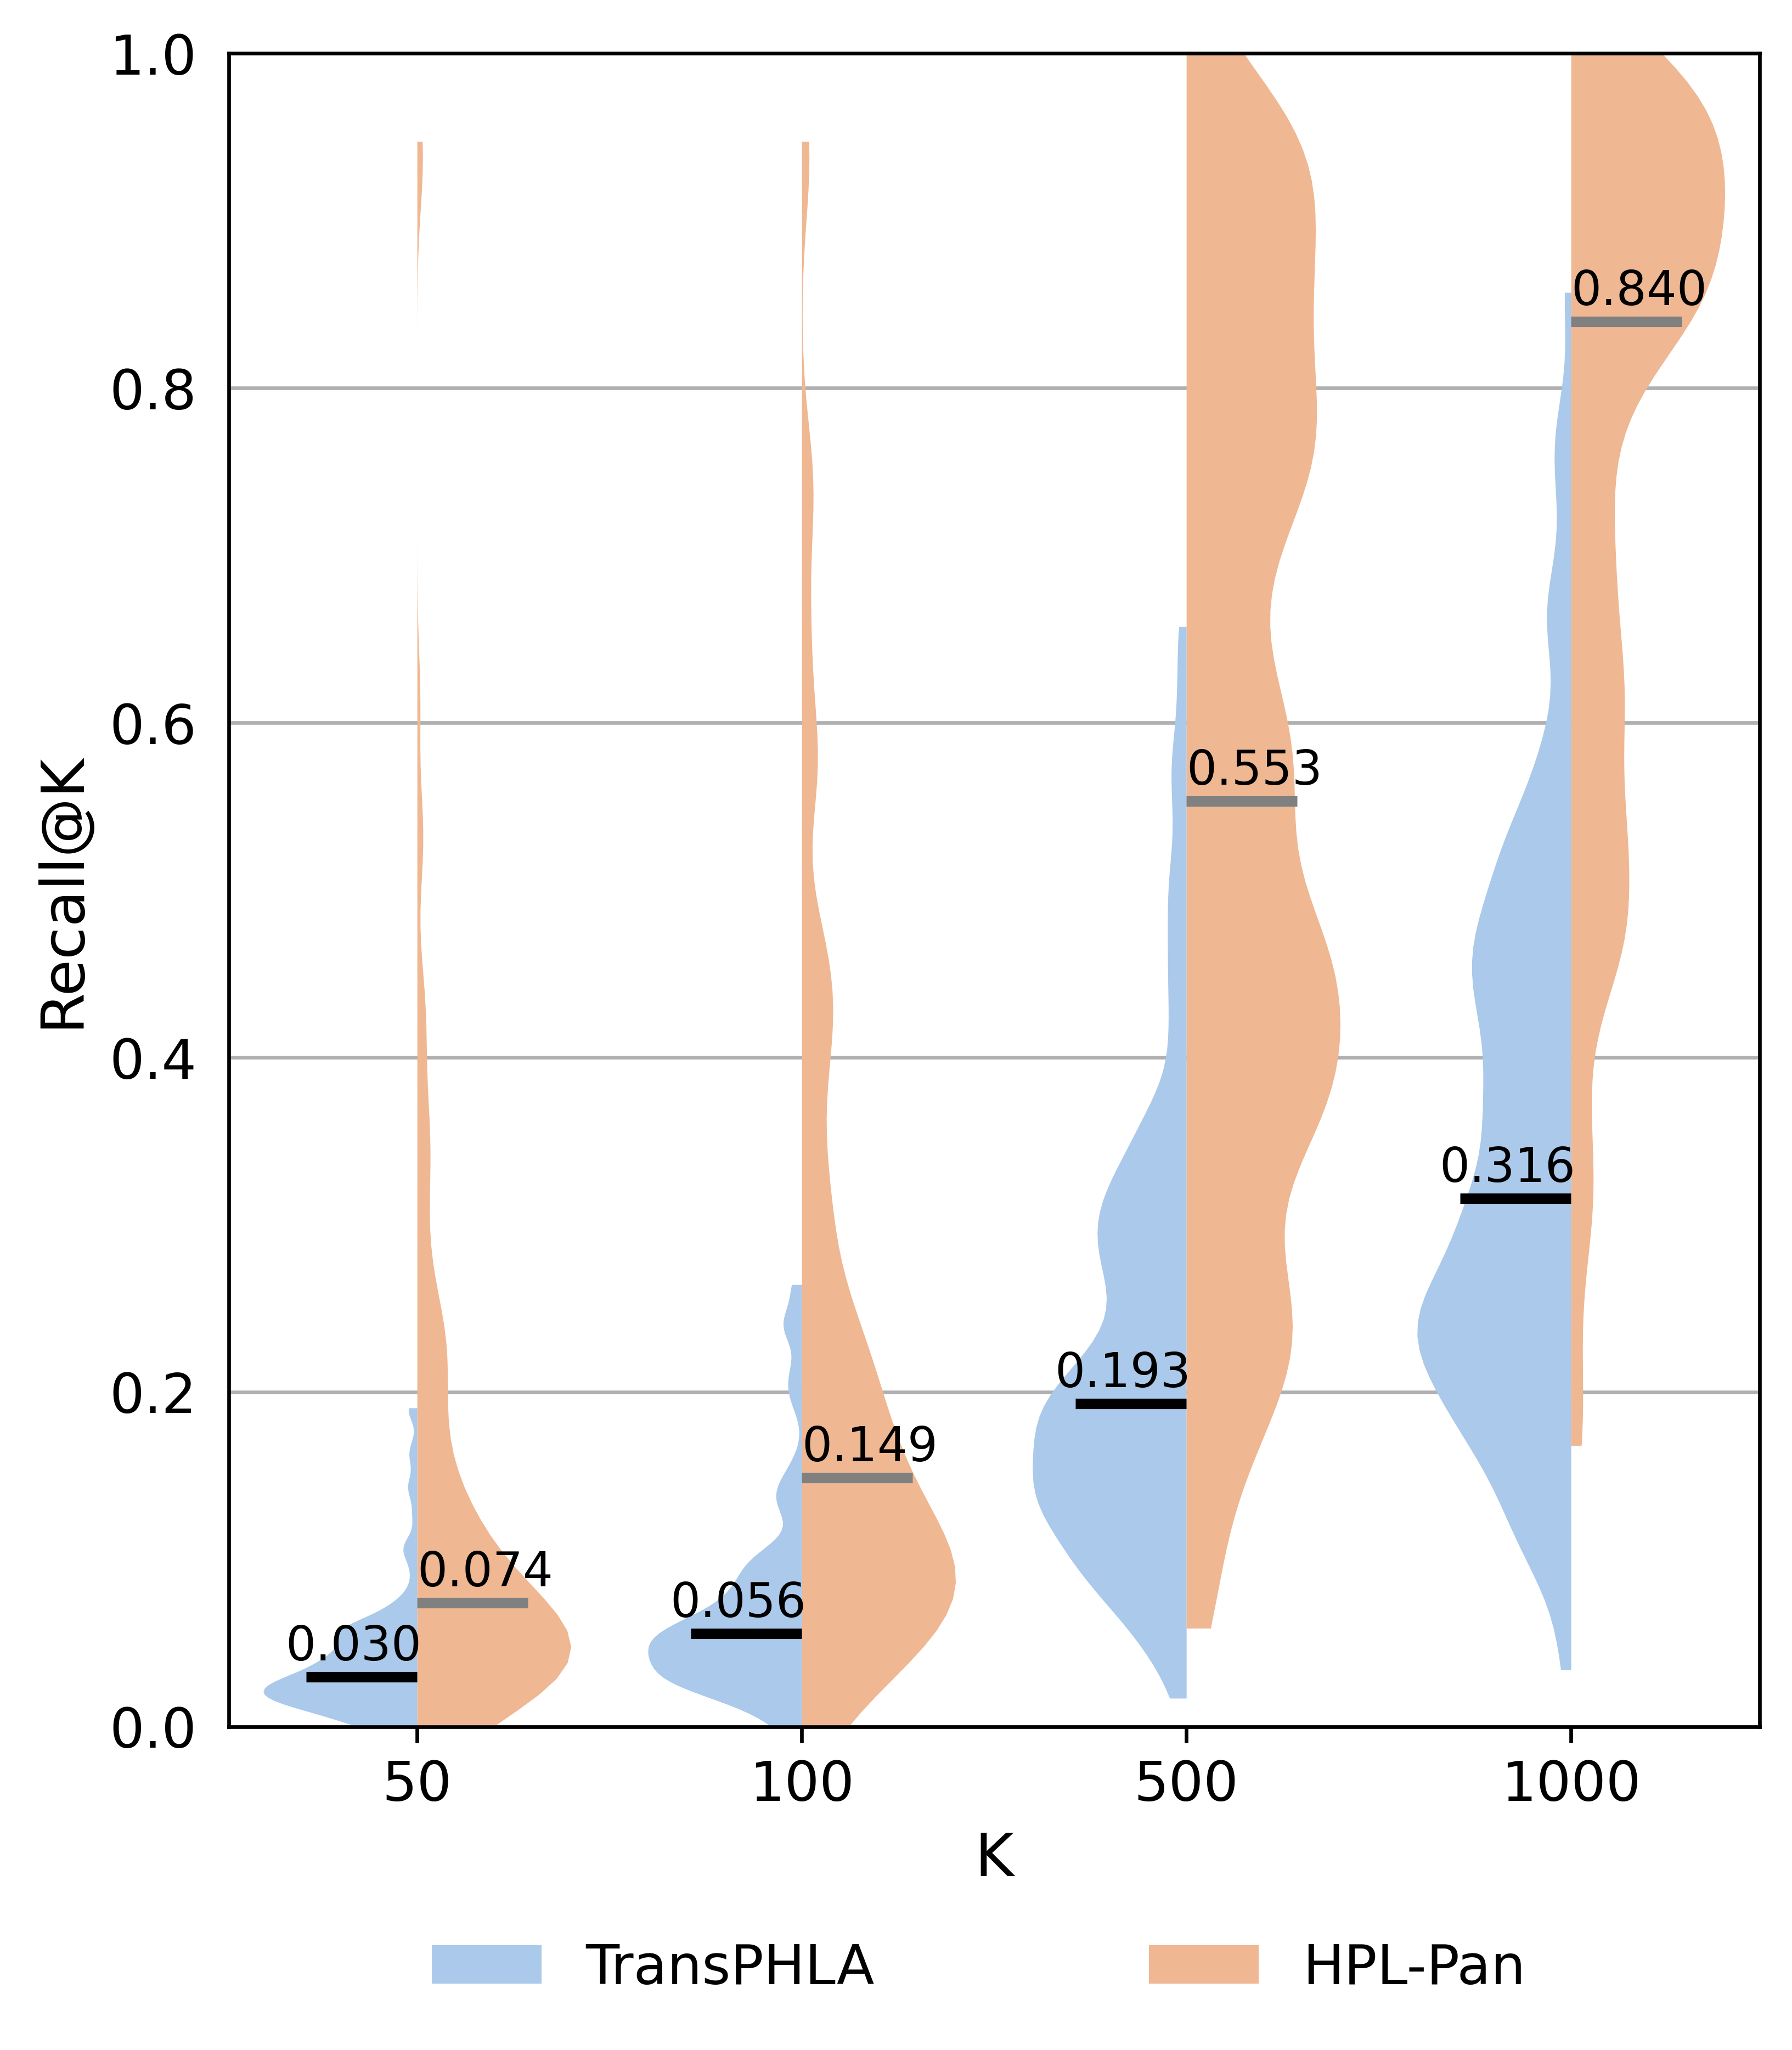

In [8]:
datapath = "../fullranking_csvs/test/"
our_res = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
tra_res = pd.read_csv(datapath + "TransPHLA/34mer_original_TransPHLA.csv", index_col=0)

our_median = list(our_res.median(numeric_only=True))[:4]
tra_median = list(tra_res.median(numeric_only=True))[:4]

plt.rcParams['figure.figsize'] = (6, 6.6)     # 6.5, 6.1 | 6.2,6.3

fig, ax = plt.subplots(1,1)
# from matplotlib.ticker import ScalarFormatter, FixedLocator
# ax.set_yscale('symlog', linthresh=0.03)
# ax.yaxis.set_major_locator(FixedLocator([0.00,0.05,0.10,0.20,0.40,0.80]))
# ax.yaxis.set_major_formatter(ScalarFormatter())

plot_part2_common(our_res, tra_res, plot_type="violin")

ax.tick_params(bottom=True, left=False, direction='out')
ax.grid(which='major', axis='y')
ax.set_ylim((-0.,1.))
median_width = 0.288
for ind, (tra_med, our_med) in enumerate(zip(tra_median, our_median)):
    ax.hlines(tra_med, ind-median_width, ind, colors="black", linestyles='solid', linewidth=2.3)
    ax.hlines(our_med, ind, ind+median_width, colors="gray", linestyles='solid', linewidth=2.3)
    ax.text(ind-0.342, tra_med+0.01, "{:.3f}".format(tra_med), fontsize=10.4)
    ax.text(ind, our_med+0.01, "{:.3f}".format(our_med), fontsize=10.4)

plt.rc('axes', axisbelow=True)
# plt.tight_layout(pad=0.5)     # pad at egde fo each part(eg. plot and xticks)
plt.savefig("./pngs_final3/part3_violin.png", dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-3_无stick.svg", format='svg', dpi=dpi, bbox_inches='tight')

---
### Part-3 1.0

In [14]:
def plot_part3_single(ax, dfs, allele, chosen_topk=['50', '100', '500', '1000', '5000', '10000', '100000']):

    hit_all_df = []
    for df2 in dfs:
        target_HLA_res = df2[df2['HLA'].isin([allele])]
        hit = []
        for k in chosen_topk:
            hit.append(target_HLA_res['hit@'+k].item())
        hit_all_df.append(hit)
    hit_all_df = np.asarray(hit_all_df)
    
    colors = ['#a1c9f4',  '#d0bbff', '#cfcfcf', '#8de5a1', '#ff9f9b',  '#fffea3','#debb9b' '#b9f2f0', '#fab0e4',]
    indexes = np.arange(len(chosen_topk))
    bar_width = 0.11        # 0.15
    for ind, hit in enumerate(hit_all_df):
        bar_container = ax.bar(indexes-bar_width*1.6*((len(dfs)-1)/2-ind), hit, width=bar_width, label='value', color=colors[ind])
        ax.bar_label(bar_container, fmt='%.0f', fontsize="small")
        
    ax.set_xlabel('K')
    ax.set_xlim(indexes[0]-0.5, indexes[-1]+0.5)
    ax.set_xticks(indexes)
    ax.set_xticklabels(chosen_topk)
    ax.set_ylabel('Hit@K')
    ax.set_ylim(0, 1100)
    ax.set_yticks(np.arange(len(chosen_topk)+1)*250)
    
def plot_part3_ensemble(ax, df1, df2, allele, chosen_topk=['50', '100', '500', '1000', '5000', '10000', '100000']):

    merged_HLA_res = pd.merge(df1, df2, on = ["HLA", "pos_num"])            # cat and remove duplicate columes
    merged_HLA_res = merged_HLA_res[merged_HLA_res['HLA'].isin([allele])]
    hit1, hit2, gains = [], [], []
    for k in chosen_topk:
        gains.append(merged_HLA_res['recall@'+k+'_x'].item() - merged_HLA_res['recall@'+k+'_y'].item())
        hit1.append(merged_HLA_res['hit@'+k+'_y'].item())
        hit2.append(merged_HLA_res['hit@'+k+'_x'].item())
    
    indexes = np.arange(len(chosen_topk))
    bar_width = 0.35
    bar_container = ax.bar(indexes-bar_width/2, hit1, width=bar_width, label='value')
    ax.bar_label(bar_container, fmt='%.0f')
    bar_container = ax.bar(indexes+bar_width/2, hit2, width=bar_width, label='value')
    ax.bar_label(bar_container, fmt='%.0f')
    ax.set_xlabel('K')
    ax.set_xlim(indexes[0]-0.5, indexes[-1]+0.5)
    ax.set_xticks(indexes)
    ax.set_xticklabels(chosen_topk)
    ax.set_ylabel('Hit@K')
    ax.set_ylim(0, 1100)
    ax.set_yticks(np.arange(len(chosen_topk)+1)*250)

In [1]:
import seaborn as sns
pal = "pastel"
print(sns.color_palette(pal).as_hex())
sns.color_palette(pal)

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

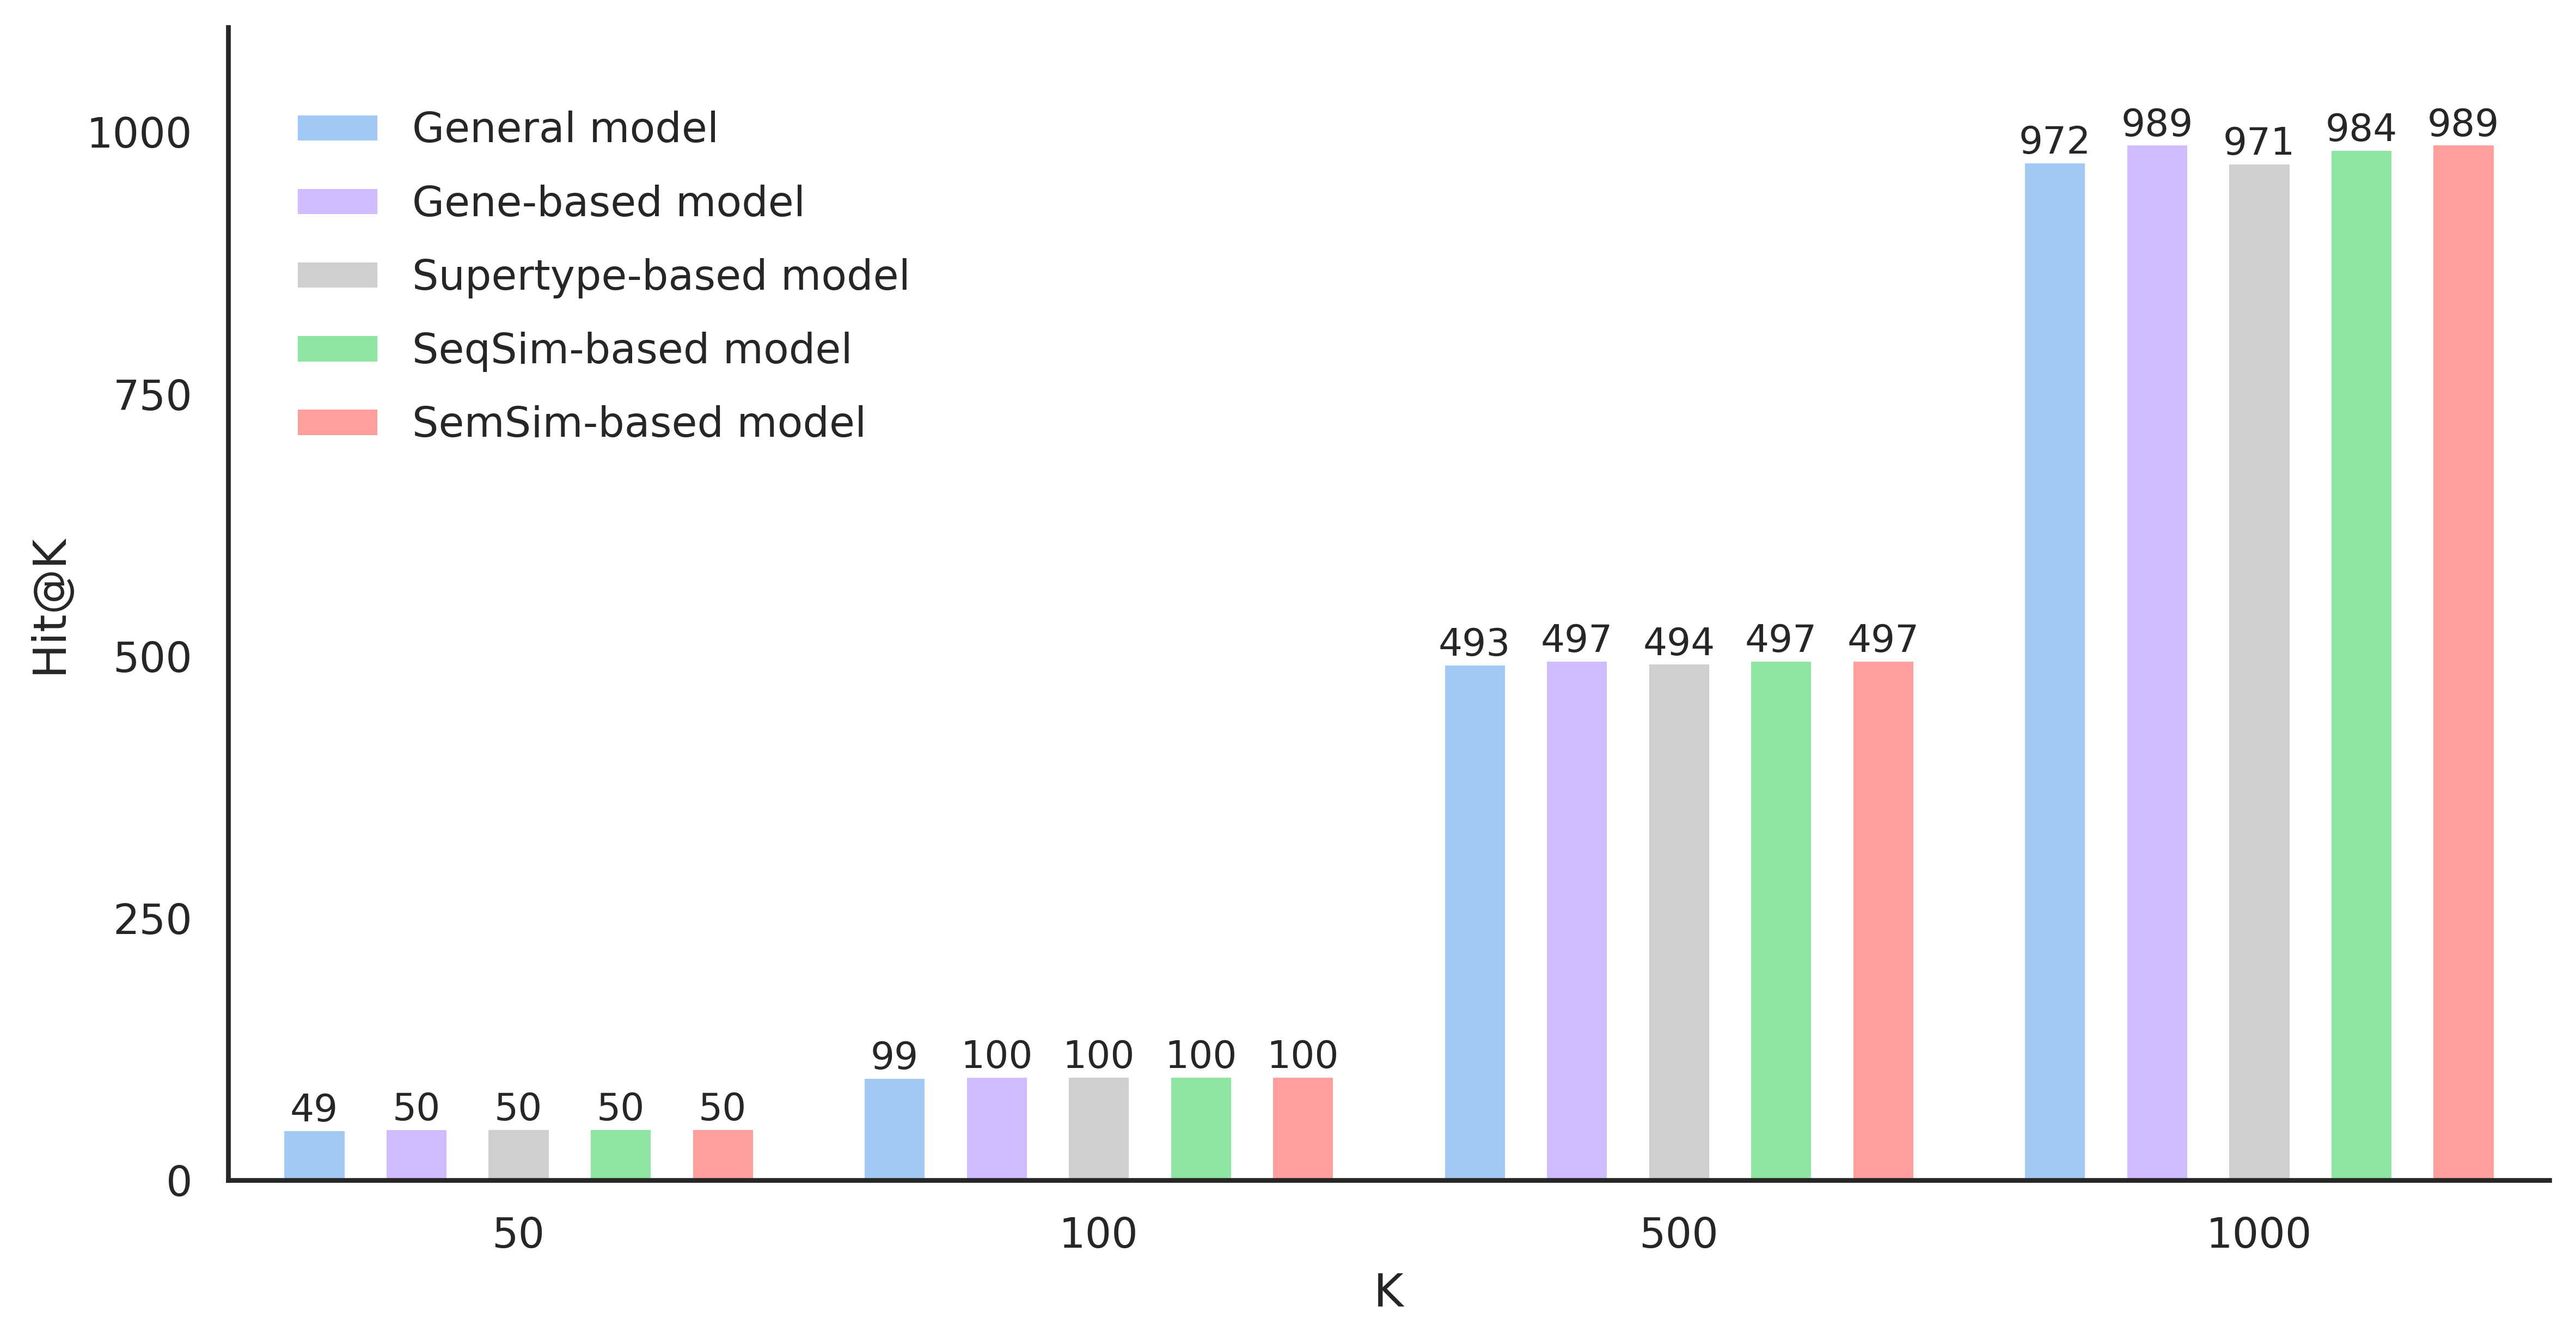

In [179]:
target_allele = "HLA-B*42:01"

datapath = "../fullranking_csvs/zeroshot_abc/"
res1 = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
res2 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_gene_1e-05_ep10_B4201.csv", index_col=0)
res3 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_supertype_1e-05_ep9_B4201.csv", index_col=0)
res4 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_seq_more_6e-06_ep13_B4201.csv", index_col=0)
res5 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_semantic_equal_1e-05_ep18_B4201.csv", index_col=0)
res6 = pd.read_csv(datapath + "HPL-Allele/182mer_RN_ft_tape_ensemble_B4201_2.csv", index_col=0)

model_name = ["General model",
              "Gene-based model",
              "Supertype-based model",
              "SeqSim-based model",
              "SemSim-based model",
              "Ensemble model"]
bigtitle = "Performance gains of {} allele-specific models over general prediction model".format(target_allele)

sns.set(style="white", palette="pastel")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (11, 5.5)

res_dfs = [res1, res2, res3, res4, res5]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plot_part3_single(ax, res_dfs, target_allele, chosen_topk=['50', '100', '500', '1000'])
ax.legend(model_name[:5], fontsize=11, labelspacing=0.8, frameon=False, bbox_to_anchor=[0.31,0.96],)
# ax.set_yticks([0,50,100,500,1000])
# plt.tight_layout(pad=1)
plt.savefig("./pngs_final/part3_B4201_single.png", dpi=500, bbox_inches='tight')

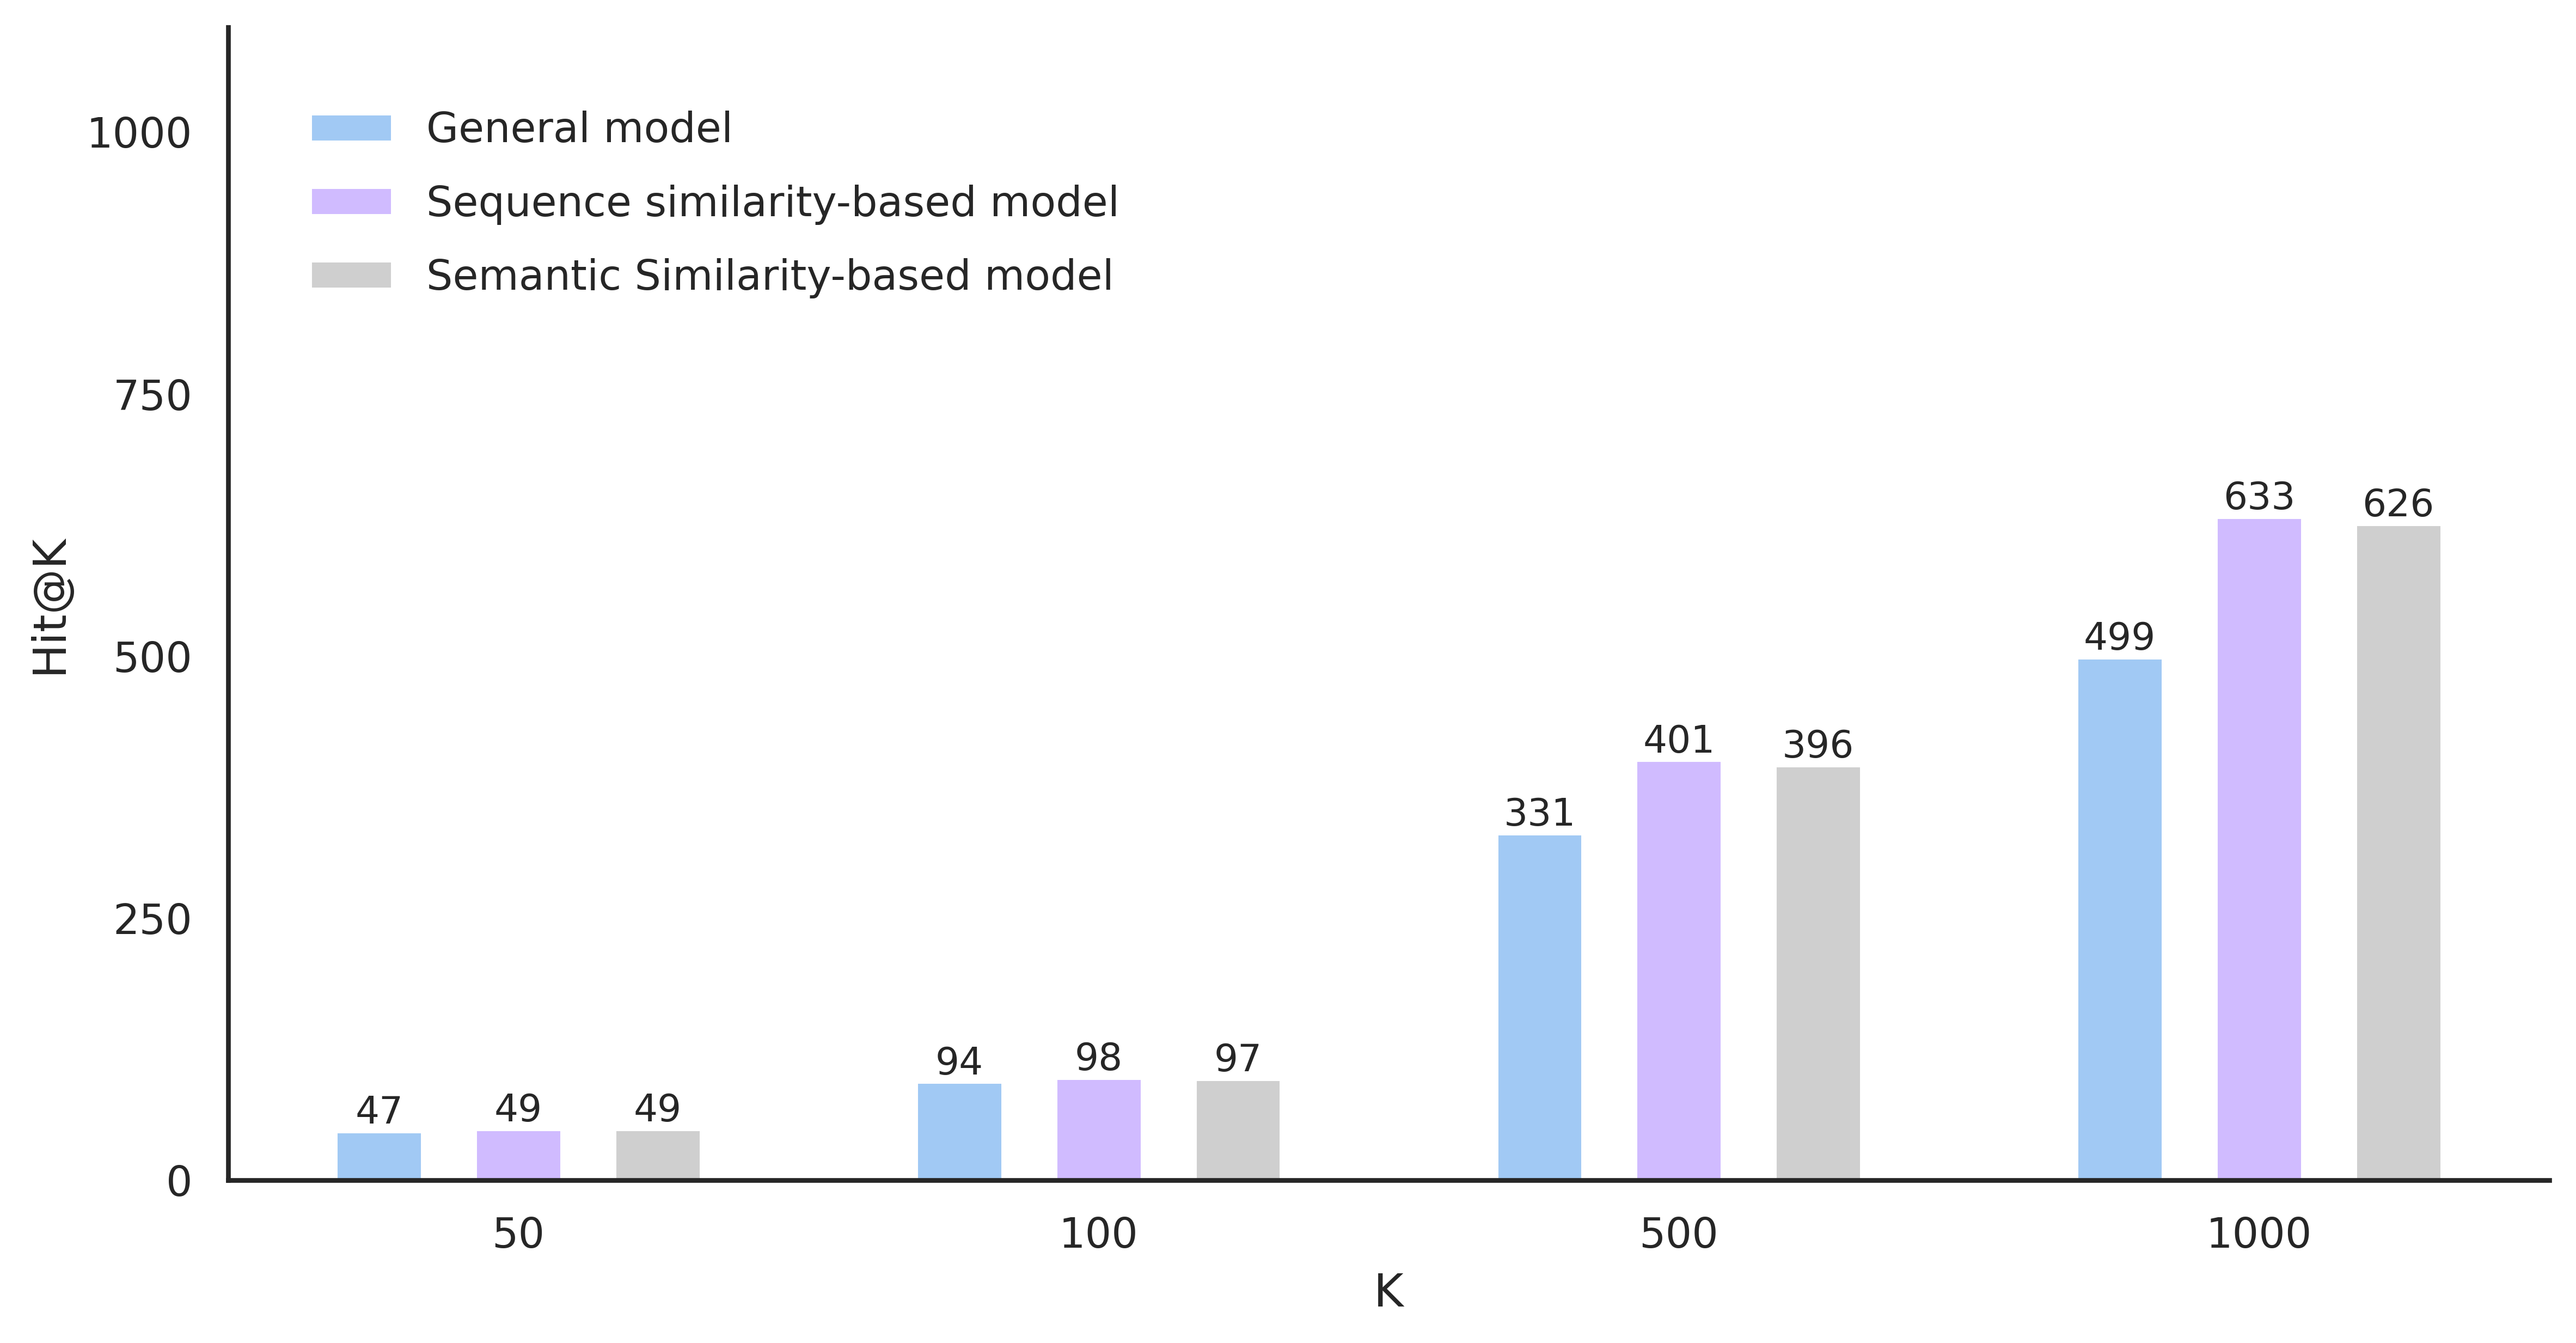

In [175]:
target_allele = "HLA-G*01:01"

datapath = "../fullranking_csvs/zeroshot_eg/"
res1 = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
res4 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_G_seq_more_1e-05_ep13_G0101.csv", index_col=0)
res5 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_G_semantic_equal_1e-05_ep8_G0101.csv", index_col=0)
res6 = pd.read_csv(datapath + "HPL-Allele/182mer_RN_ft_tape_ensemble_G0101.csv", index_col=0)

model_name = ["General model",
              "Sequence similarity-based model",
              "Semantic Similarity-based model",
              "Ensemble model"]
bigtitle = "Performance gains of {} allele-specific models over general prediction model".format(target_allele)

sns.set(style="white", palette="pastel")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (11, 5.5)

res_dfs = [res1, res4, res5]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plot_part3_single(ax, res_dfs, target_allele, chosen_topk=['50', '100', '500', '1000'])
ax.legend(model_name[:5], fontsize=11, labelspacing=0.8, frameon=False, bbox_to_anchor=[0.4,0.96],)
plt.savefig("./pngs_final/part3_G0101_single.png", dpi=500, bbox_inches='tight')

### Part-3 2.0

In [126]:
def plot_part3(ax, df1, df2, allele, df1_color, bar_width, chosen_topk=['50', '100', '500', '1000', '5000', '10000', '100000']):
    merged_HLA_res = pd.merge(df1, df2, on = ["HLA", "pos_num"])            # cat and remove duplicate columes
    merged_HLA_res = merged_HLA_res[merged_HLA_res['HLA'].isin([allele])]
    hit1, hit2, gains = [], [], []
    for k in chosen_topk:
        gains.append(merged_HLA_res['recall@'+k+'_x'].item() - merged_HLA_res['recall@'+k+'_y'].item())
        hit1.append(merged_HLA_res['hit@'+k+'_y'].item())
        hit2.append(merged_HLA_res['hit@'+k+'_x'].item())
    
    # dual-bar
    indexes = np.arange(len(chosen_topk))*0.7
    # bar_width = 0.24
    bar_container = ax.bar(indexes-bar_width/2, hit1, width=bar_width, 
                        #    edgecolor="none",
                           label='value')
    ax.bar_label(bar_container, fmt='%.0f', fontsize=13.1)  # 13.1
    bar_container = ax.bar(indexes+bar_width/2, hit2, width=bar_width, 
                        #    edgecolor="none", 
                           label='value', color=df1_color)
    ax.bar_label(bar_container, fmt='%.0f', fontsize=13.1)
    ax.set_xlim(indexes[0]-0.3, indexes[-1]+0.3)
    ax.set_xticks(indexes)
    ax.set_xticklabels(chosen_topk, fontsize=15)
    ax.set_ylim(0, 1050)
    ax.set_yticks(np.arange(len(chosen_topk)+1)*250)
    ax.set_yticklabels(np.arange(len(chosen_topk)+1)*250, fontsize=15)

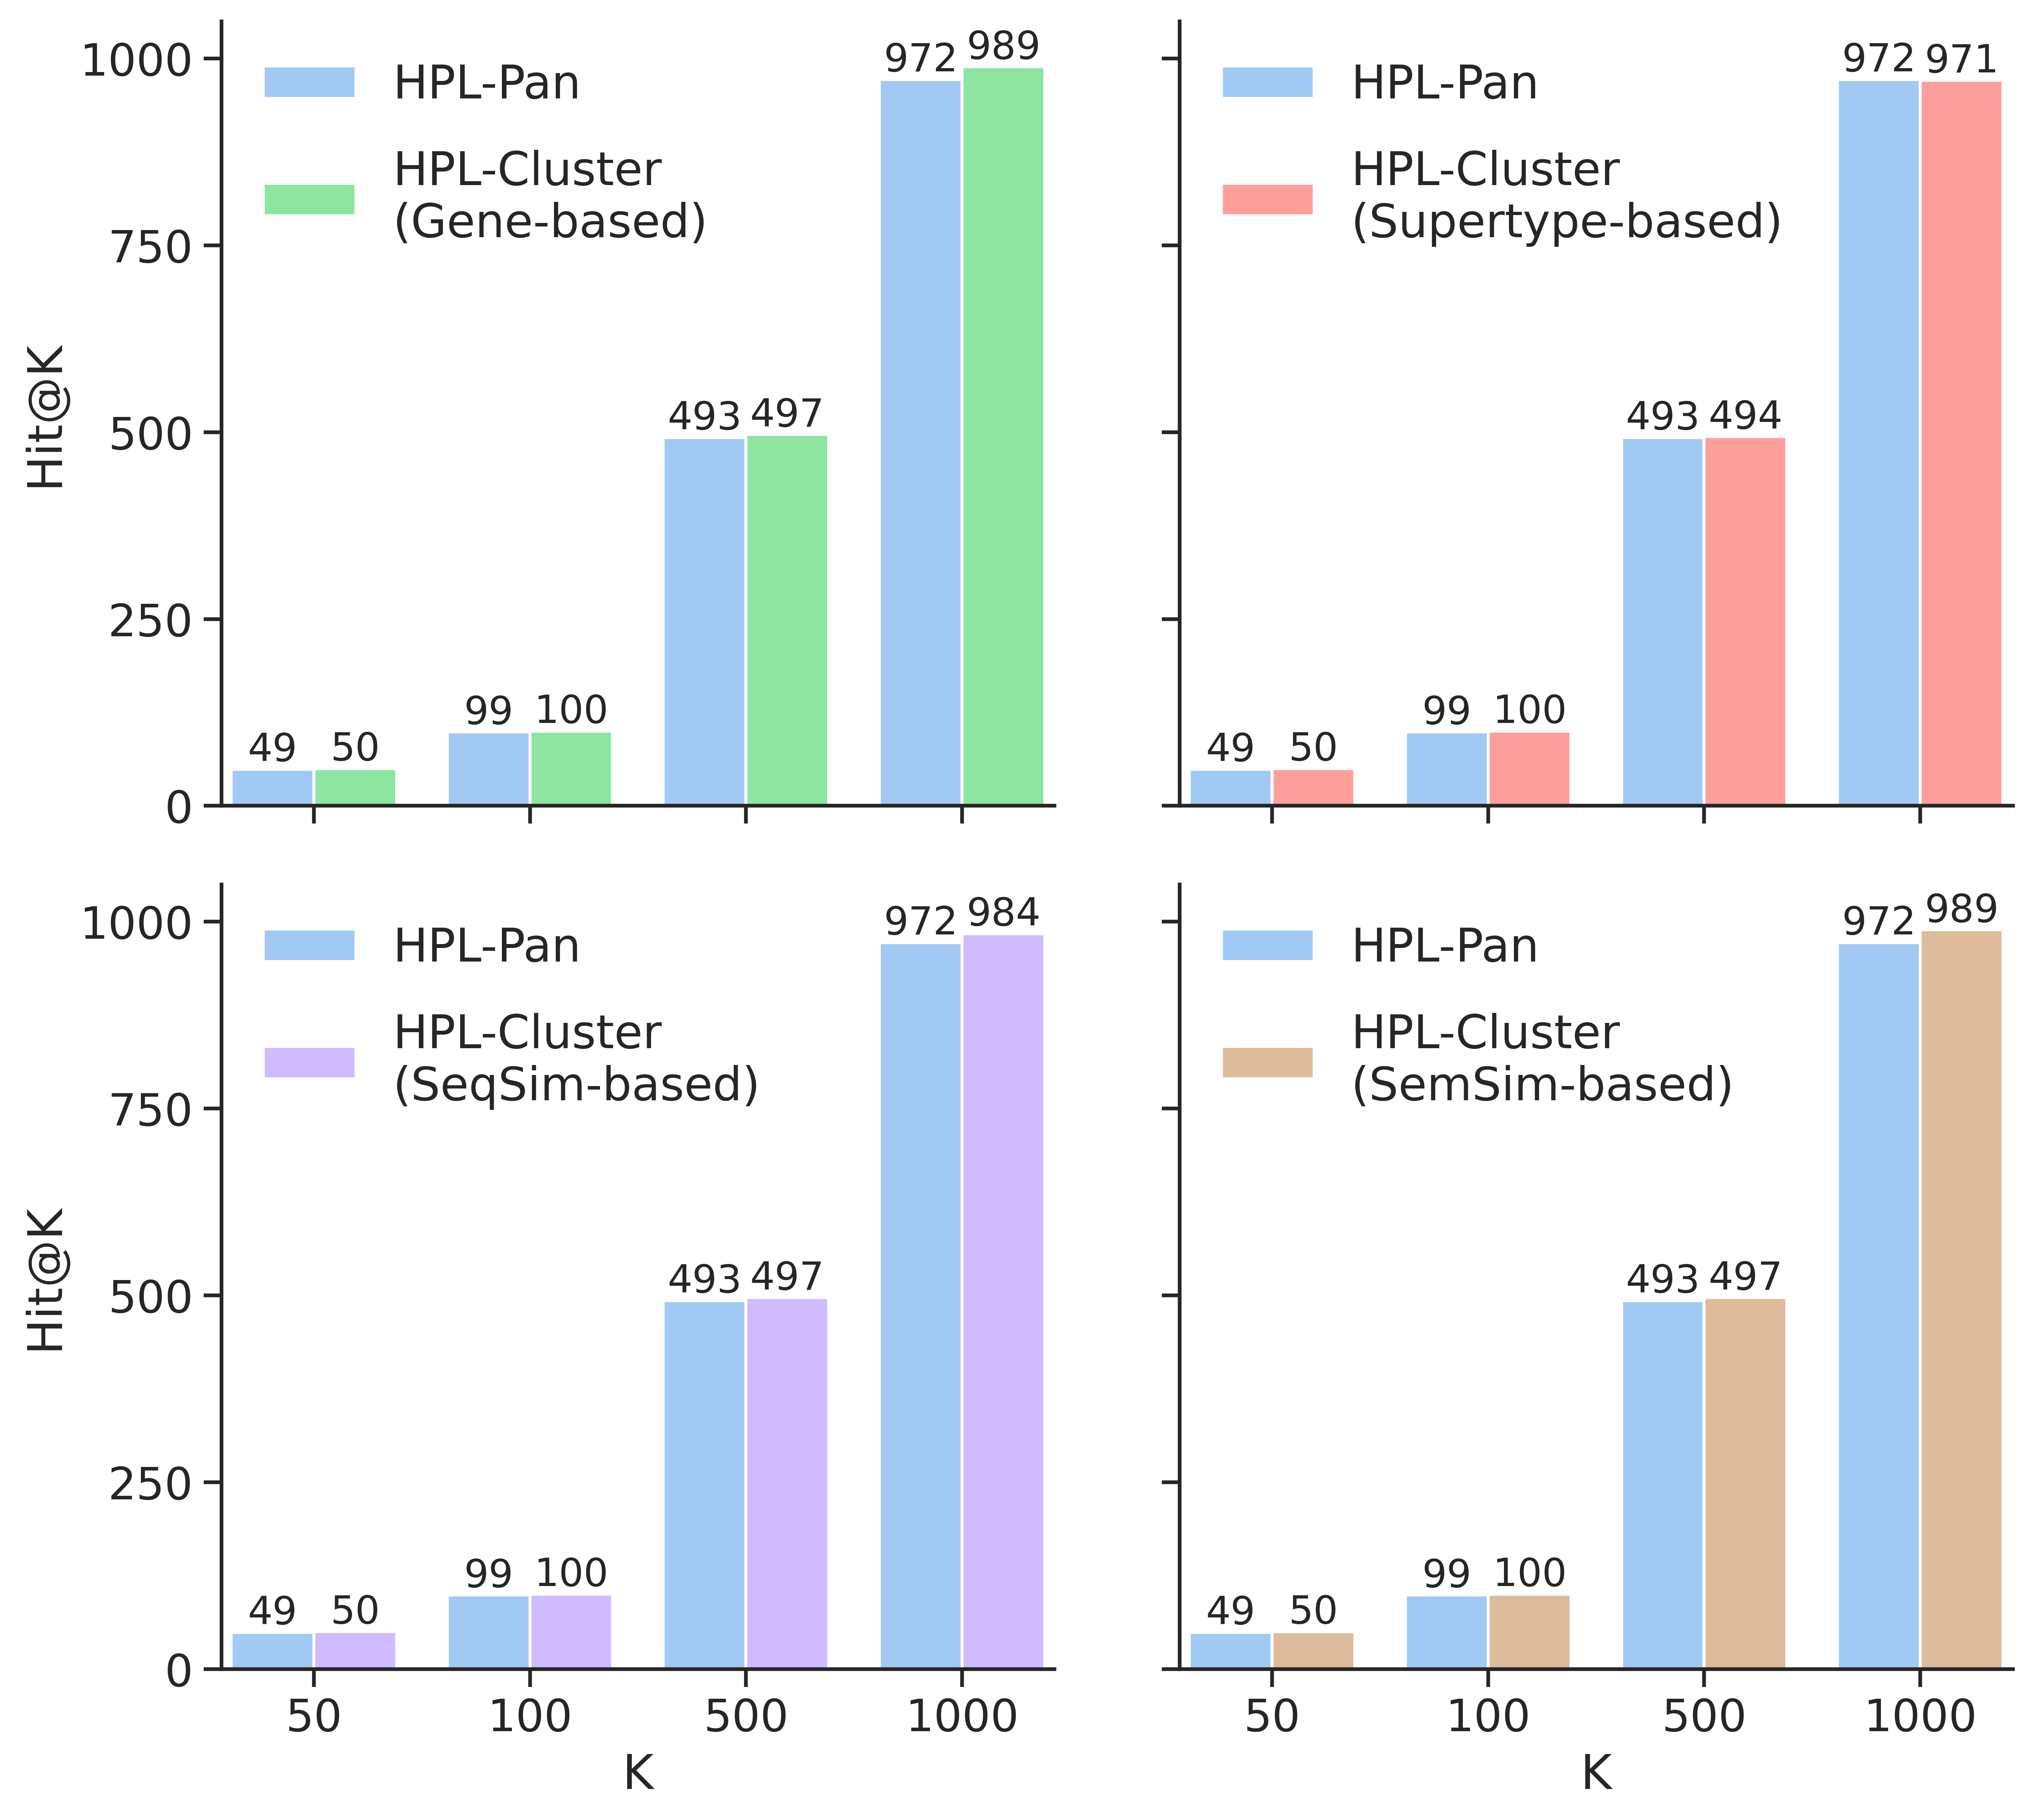

In [149]:
target_allele = "HLA-B*42:01"

datapath = "../fullranking_csvs/zeroshot_abc/"
res1 = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
res2 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_gene_1e-05_ep10_B4201.csv", index_col=0)
res3 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_supertype_1e-05_ep9_B4201.csv", index_col=0)
res4 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_seq_more_6e-06_ep13_B4201.csv", index_col=0)
res5 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_B_semantic_equal_1e-05_ep18_B4201.csv", index_col=0)
res6 = pd.read_csv(datapath + "HPL-Allele/182mer_RN_ft_tape_ensemble_B4201_2.csv", index_col=0)

model_name = ["HPL-Pan",
              "HPL-Cluster\n(Gene-based)",
              "HPL-Cluster\n(Supertype-based)",
              "HPL-Cluster\n(SeqSim-based)",
              "HPL-Cluster\n(SemSim-based)",
              "HPL-Allele"+"\n("+target_allele[:]+")"]
bigtitle = "Performance gains of {} allele-specific models over general prediction model".format(target_allele)

sns.set(style="white", palette="pastel")
plt.rcParams['figure.figsize'] = (10.8, 10)

colors = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

leg_size = 15.6
bar_width = 0.268
plot_part3(ax1, res2, res1, target_allele, "#8de5a1", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax1.legend([model_name[0], model_name[1]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.72,0.95]
           )
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel('Hit@K', fontsize=16)
ax1.tick_params(bottom='on', left='on',direction='out')

plot_part3(ax2, res3, res1, target_allele, "#ff9f9b", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax2.legend([model_name[0], model_name[2]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.805,0.95]
           )
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.tick_params(bottom='on', left='on',direction='out')

plot_part3(ax3, res4, res1, target_allele, "#d0bbff", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax3.legend([model_name[0], model_name[3]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.76,0.95]
           )
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.set_xlabel('K', fontsize=16)
ax3.set_ylabel('Hit@K', fontsize=16)
ax3.tick_params(bottom='on', left='on',direction='out')

plot_part3(ax4, res5, res1, target_allele, "#debb9b", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax4.legend([model_name[0], model_name[4]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.77,0.95]
           )
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.set_xlabel('K', fontsize=16)
ax4.tick_params(bottom='on', left='on', direction='out')

plt.subplots_adjust(wspace=0.15, hspace=0.1)
plt.savefig("./pngs_final3/part3_B4201_single.png", dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-4_1.svg", format='svg', dpi=dpi, bbox_inches='tight')

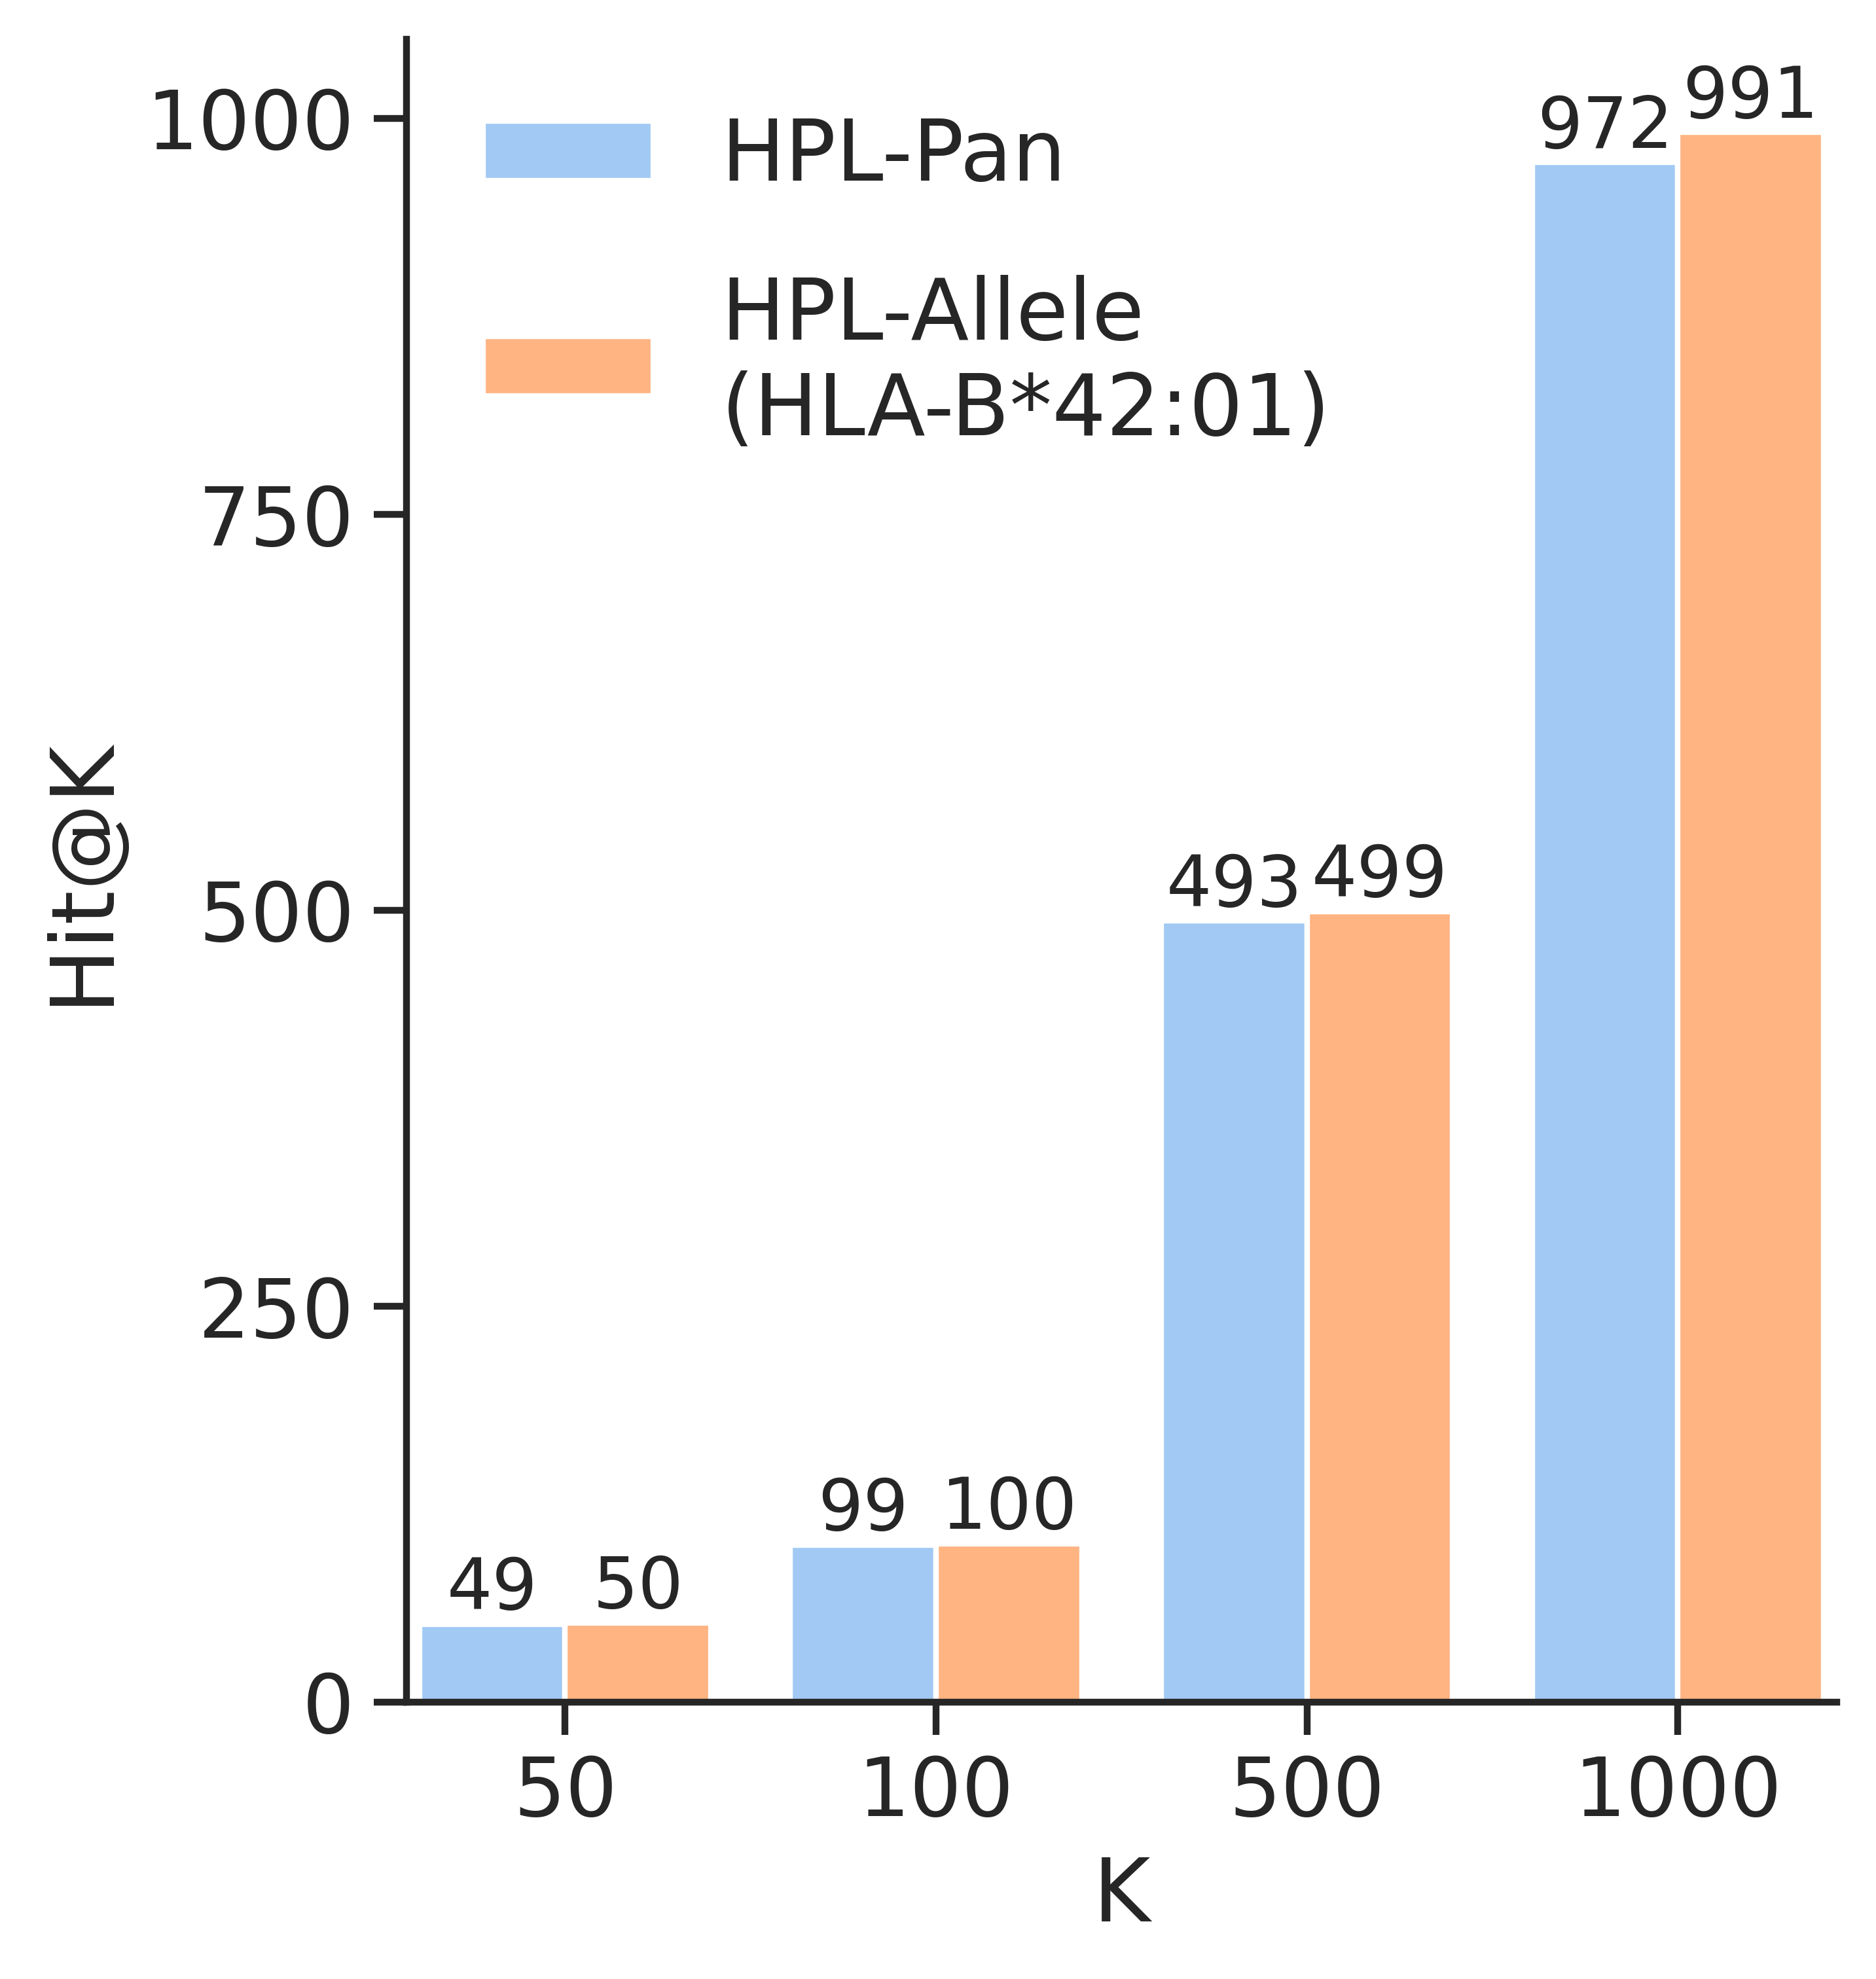

In [148]:
plt.rcParams['figure.figsize'] = (4.7, 5.5)  # 5.3,6
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

leg_size = 15.6
bar_width = 0.275
plot_part3(ax1, res6, res1, target_allele, "#ffb482", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax1.legend([model_name[0], model_name[-1]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.51,0.95]
           )
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel('Hit@K', fontsize=16)
ax1.set_xlabel('K', fontsize=16)
ax1.tick_params(bottom='on', left='on',direction='out')

plt.savefig("./pngs_final3/part3_B4201_ensemble.png", dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-4_2.svg", format='svg', dpi=dpi, bbox_inches='tight')

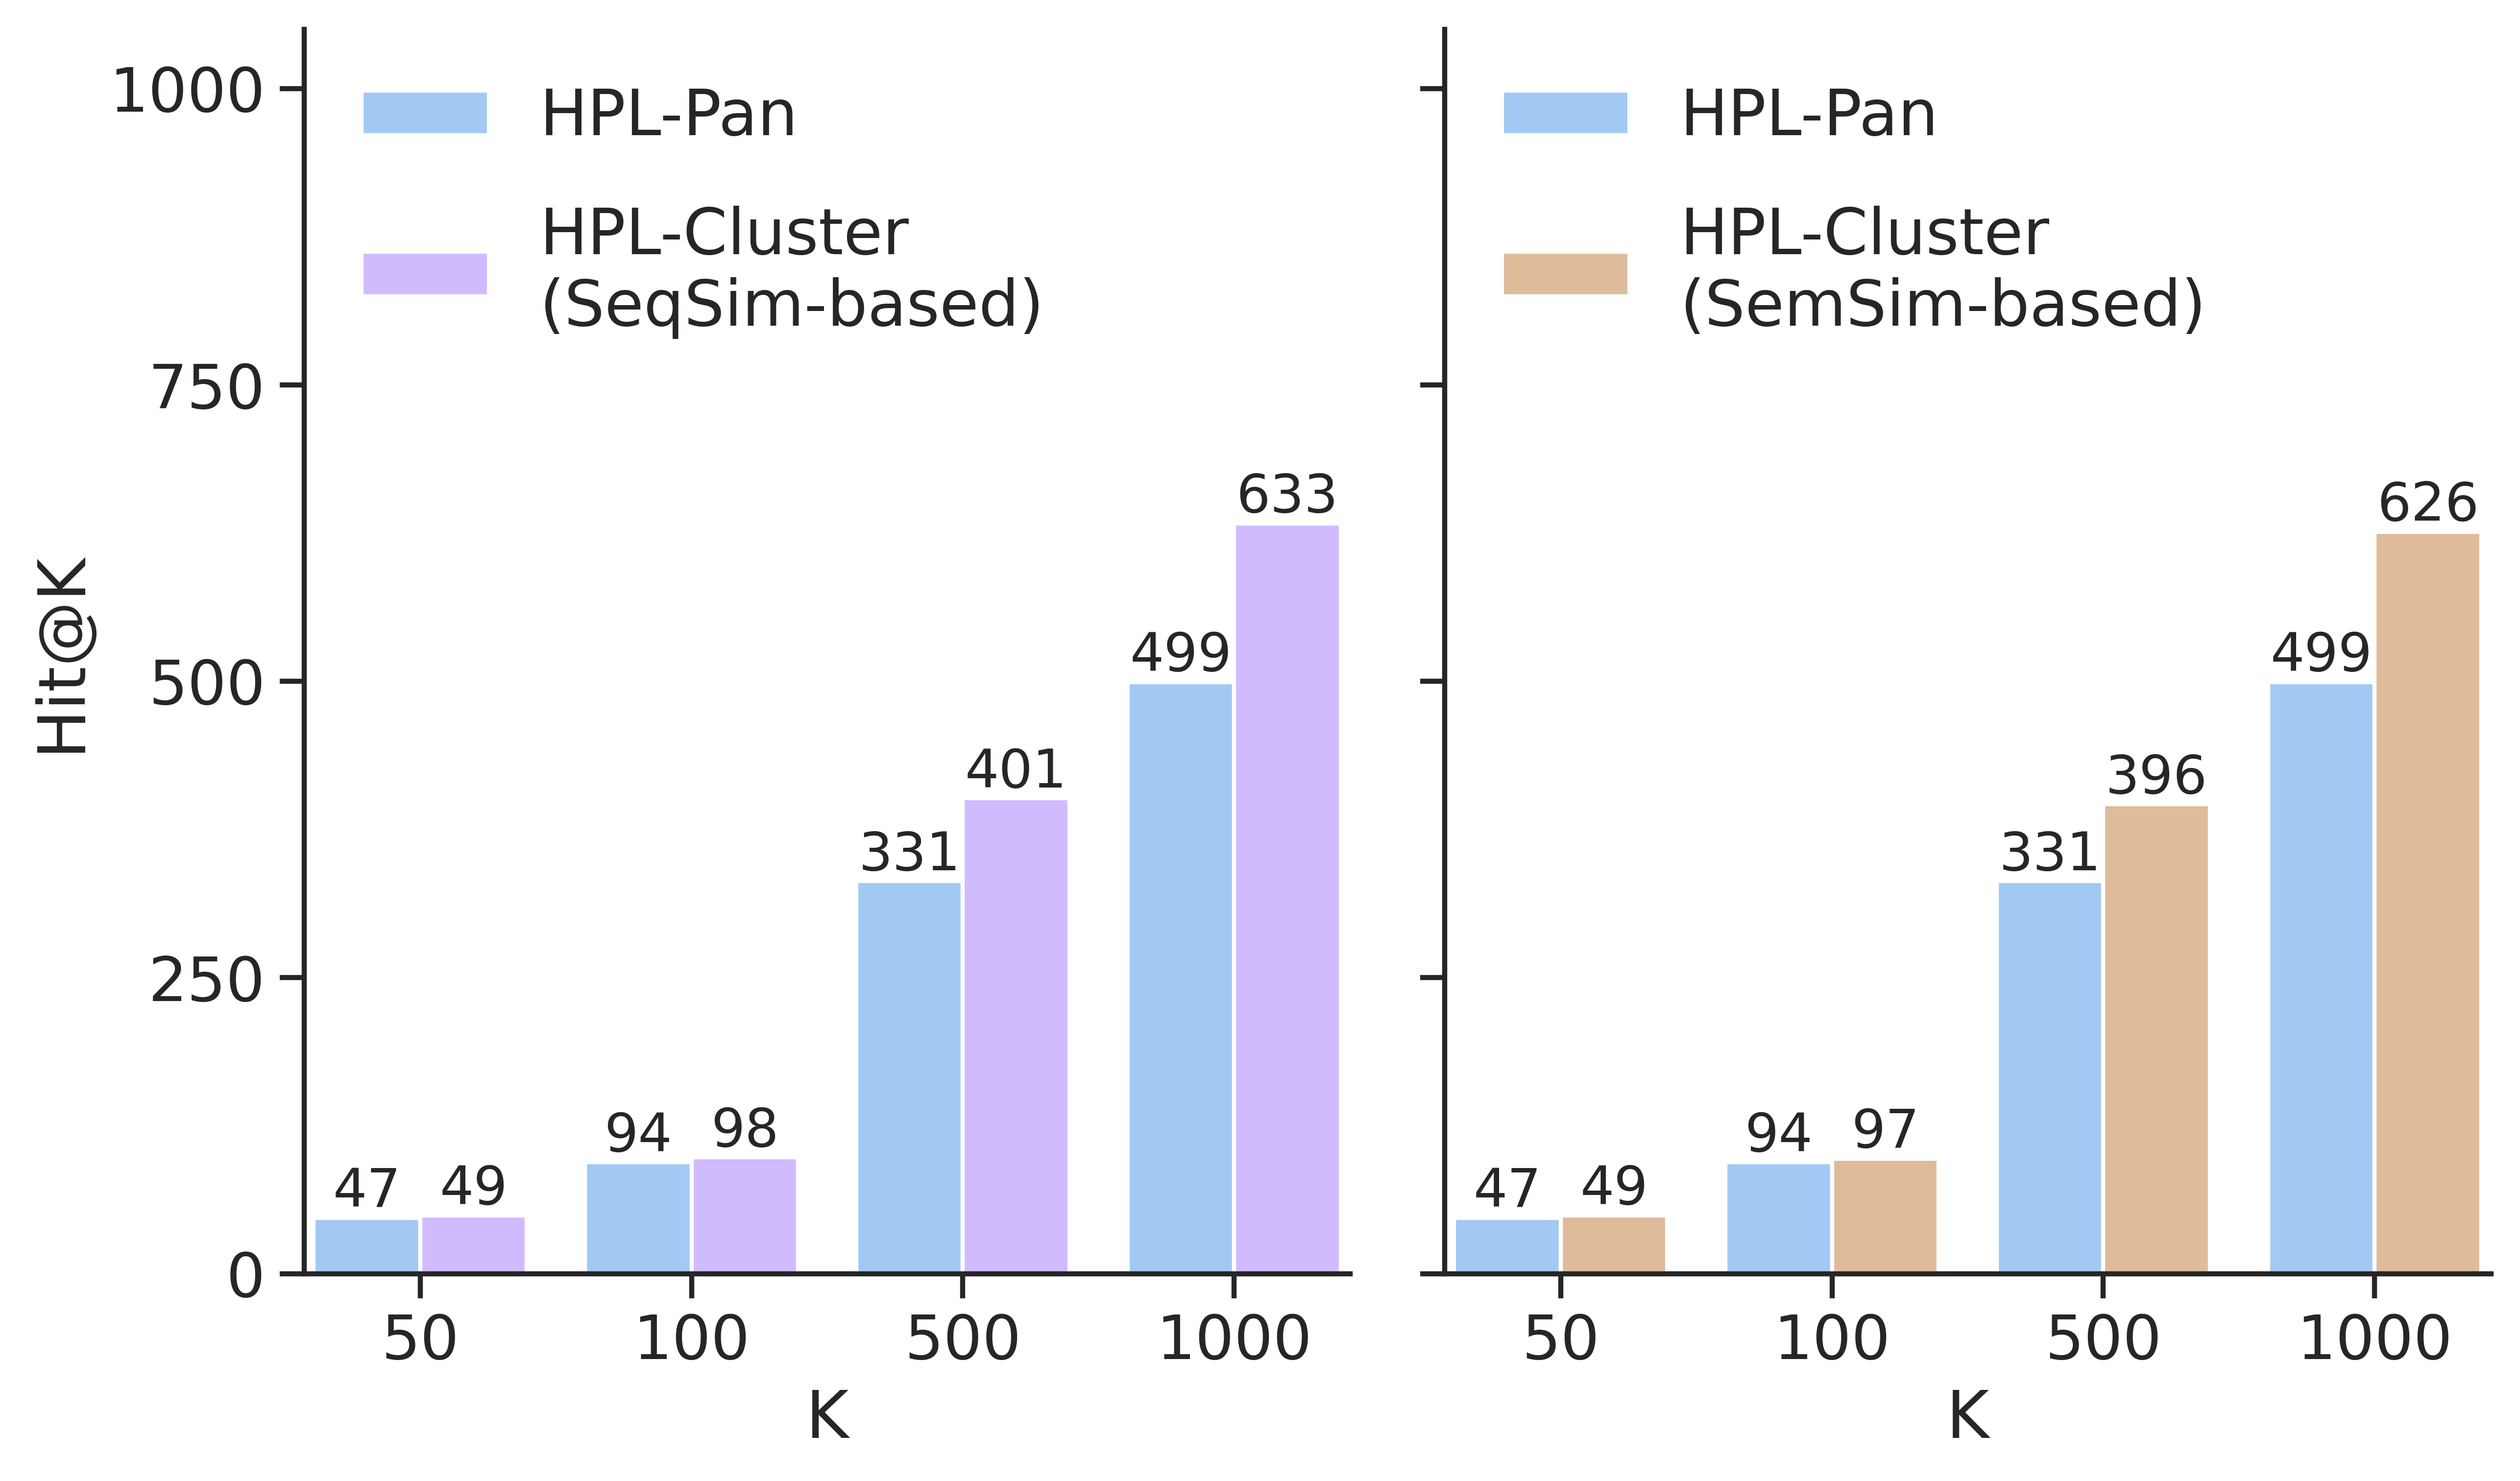

In [150]:
target_allele = "HLA-G*01:01"

datapath = "../fullranking_csvs/zeroshot_eg/"
res1 = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
res4 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_G_seq_more_1e-05_ep13_G0101.csv", index_col=0)
res5 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_G_semantic_equal_1e-05_ep8_G0101.csv", index_col=0)
res6 = pd.read_csv(datapath + "HPL-Allele/182mer_RN_ft_tape_ensemble_G0101.csv", index_col=0)

model_name = ["HPL-Pan",
              "HPL-Cluster\n(SeqSim-based)",
              "HPL-Cluster\n(SemSim-based)",
              "HPL-Allele"+"\n("+target_allele[:]+")"]
bigtitle = "Performance gains of {} allele-specific models over general prediction model".format(target_allele)

sns.set(style="white", palette="pastel")
plt.rcParams['figure.figsize'] = (9.6, 5.5)

colors = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

leg_size = 15.6
bar_width = 0.275
plot_part3(ax1, res4, res1, target_allele, "#d0bbff", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax1.legend([model_name[0], model_name[1]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.77,0.95]
           )
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel('Hit@K', fontsize=16)
ax1.set_xlabel('K', fontsize=16)
ax1.tick_params(bottom='on', left='on',direction='out')

plot_part3(ax2, res5, res1, target_allele, "#debb9b", bar_width, chosen_topk=['50', '100', '500', '1000'])
ax2.legend([model_name[0], model_name[2]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.78,0.95]
           )
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_xlabel('K', fontsize=16)
ax2.tick_params(bottom='on', left='on',direction='out')

plt.subplots_adjust(wspace=0.09)
plt.savefig("./pngs_final3/part3_G0101_single.png", dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-5_1.svg", format='svg', dpi=dpi, bbox_inches='tight')

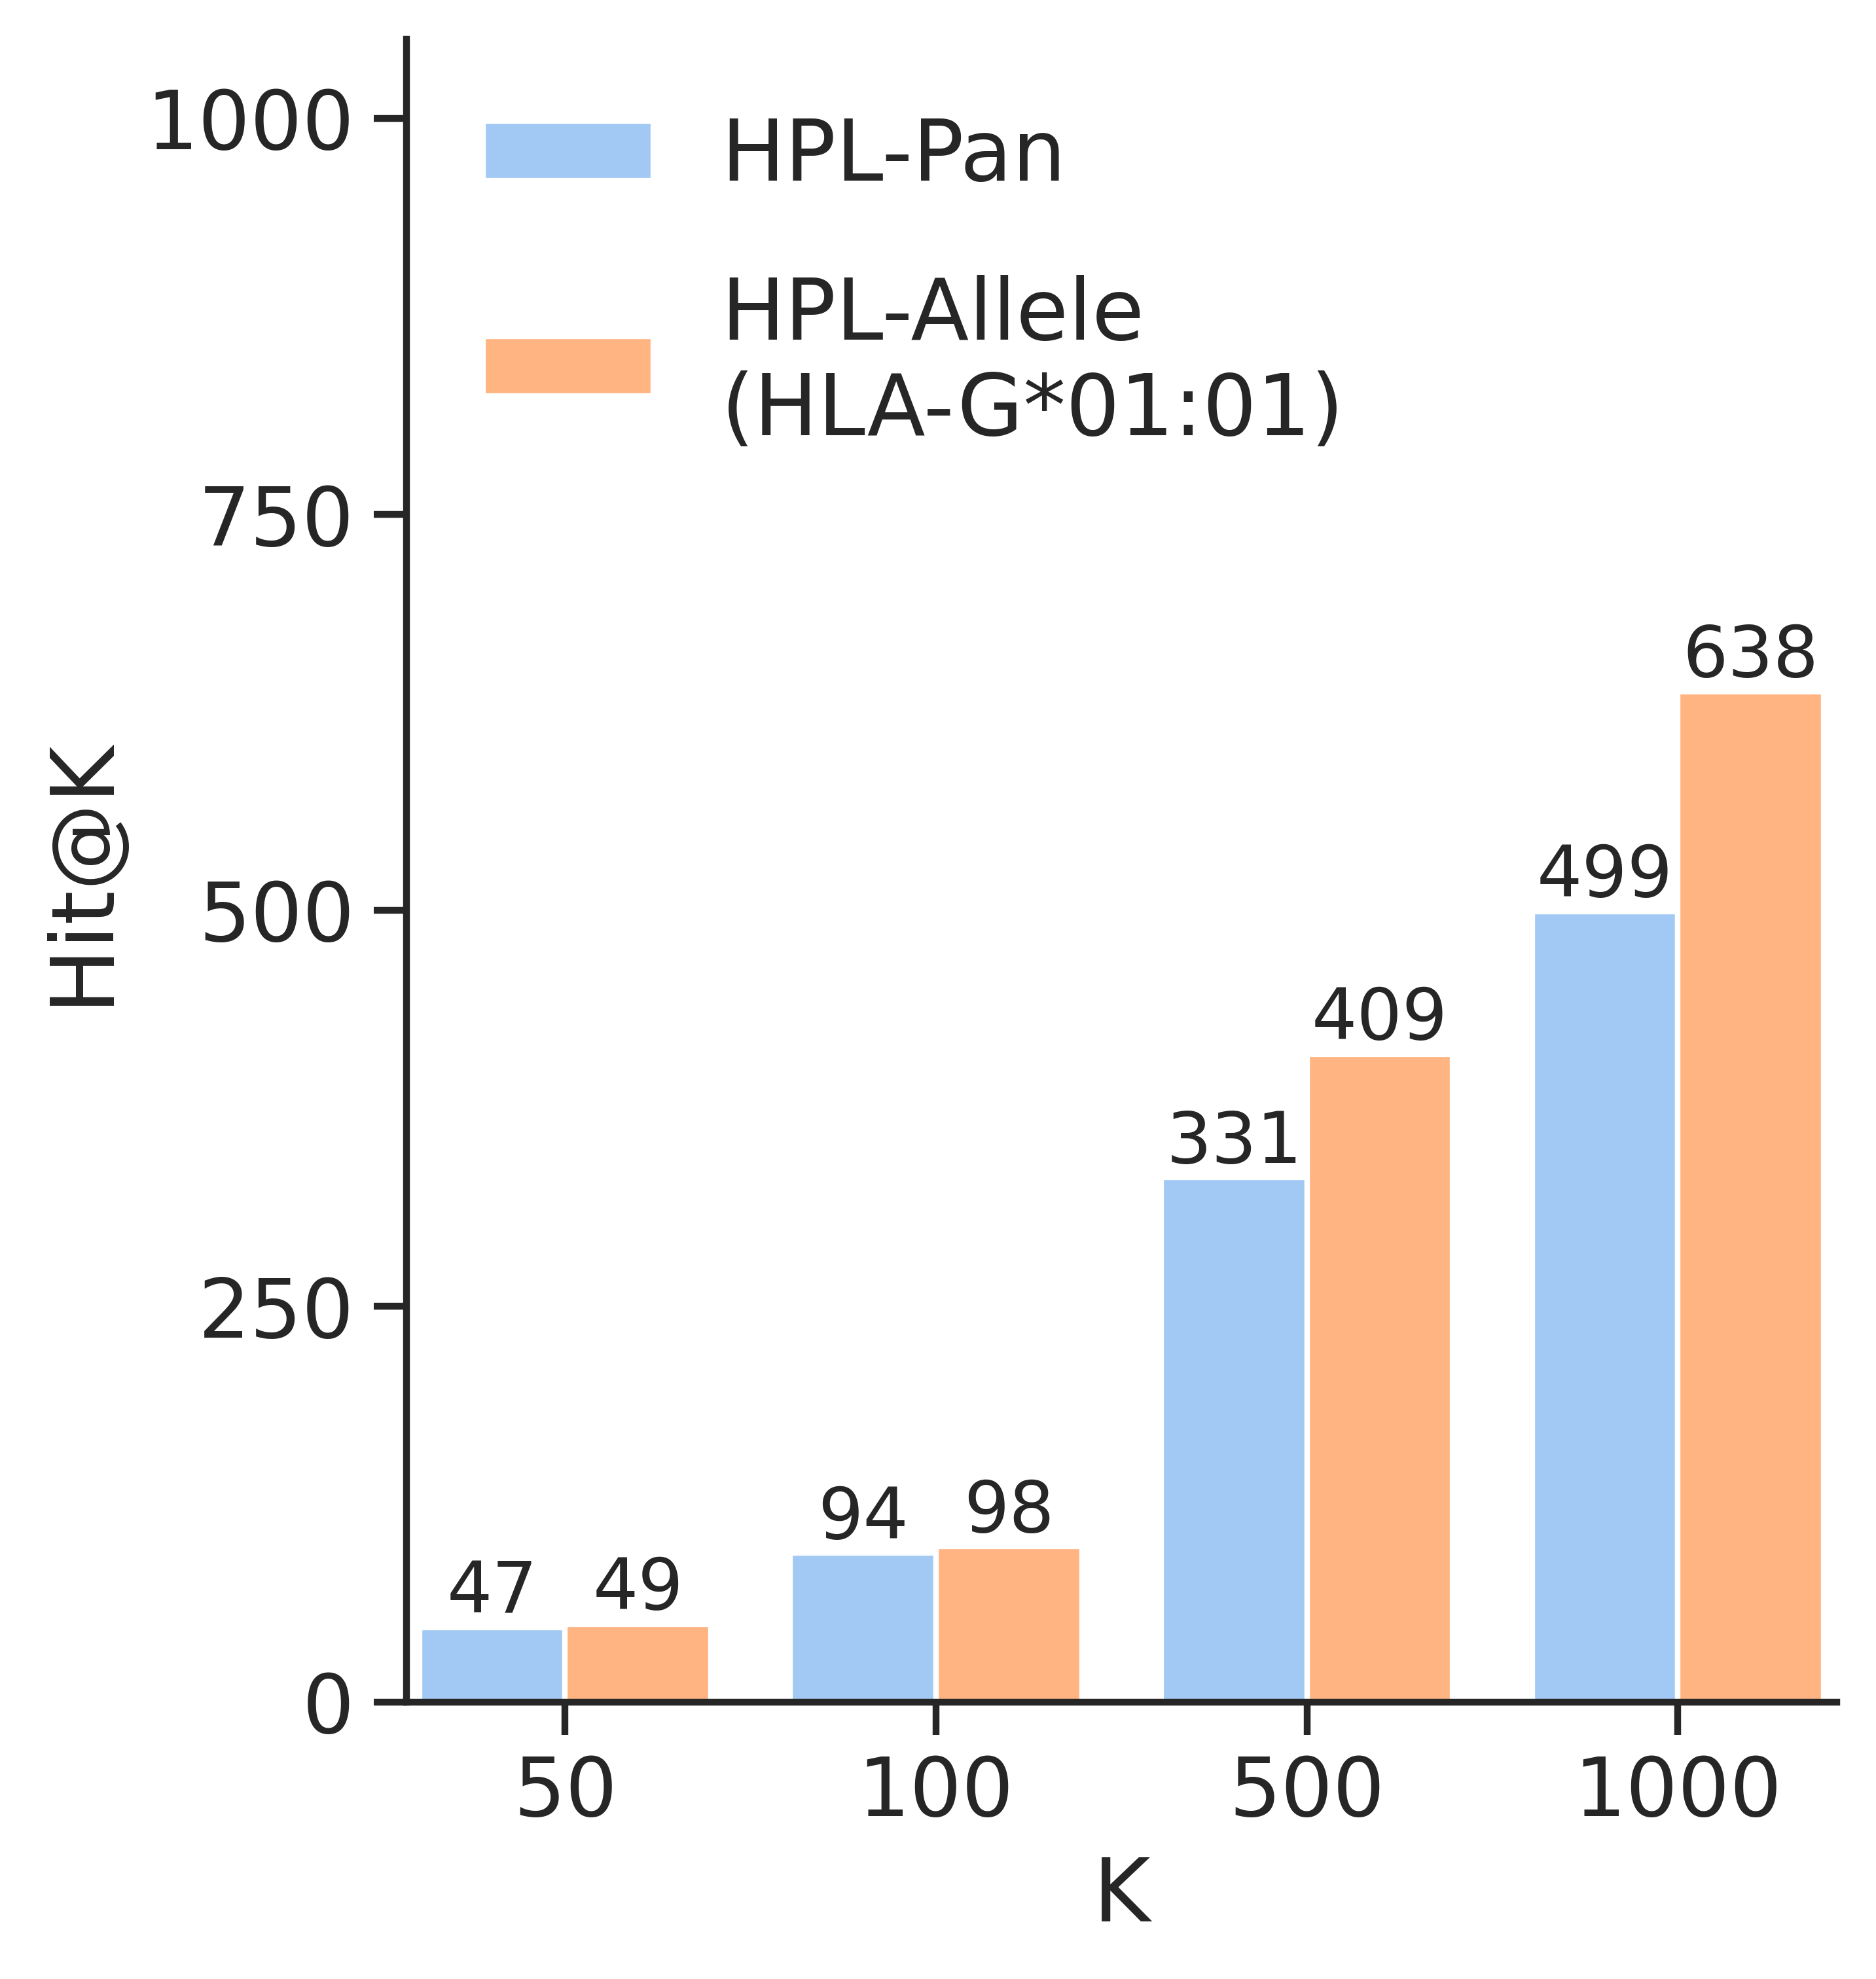

In [151]:
plt.rcParams['figure.figsize'] = (4.7, 5.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

leg_size = 15.6
bar_width = 0.275
plot_part3(ax1, res6, res1, target_allele, "#ffb482", bar_width,chosen_topk=['50', '100', '500', '1000'])
ax1.legend([model_name[0], model_name[-1]], loc="upper left",
           fontsize=leg_size, labelspacing=0.9, frameon=False, 
        #    bbox_to_anchor=[0.51,0.95]
           )
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel('Hit@K', fontsize=16)
ax1.set_xlabel('K', fontsize=16)
ax1.tick_params(bottom='on', left='on',direction='out')

plt.savefig("./pngs_final3/part3_G0101_ensemble.png", dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/3-5_2.svg", format='svg', dpi=dpi, bbox_inches='tight')

---

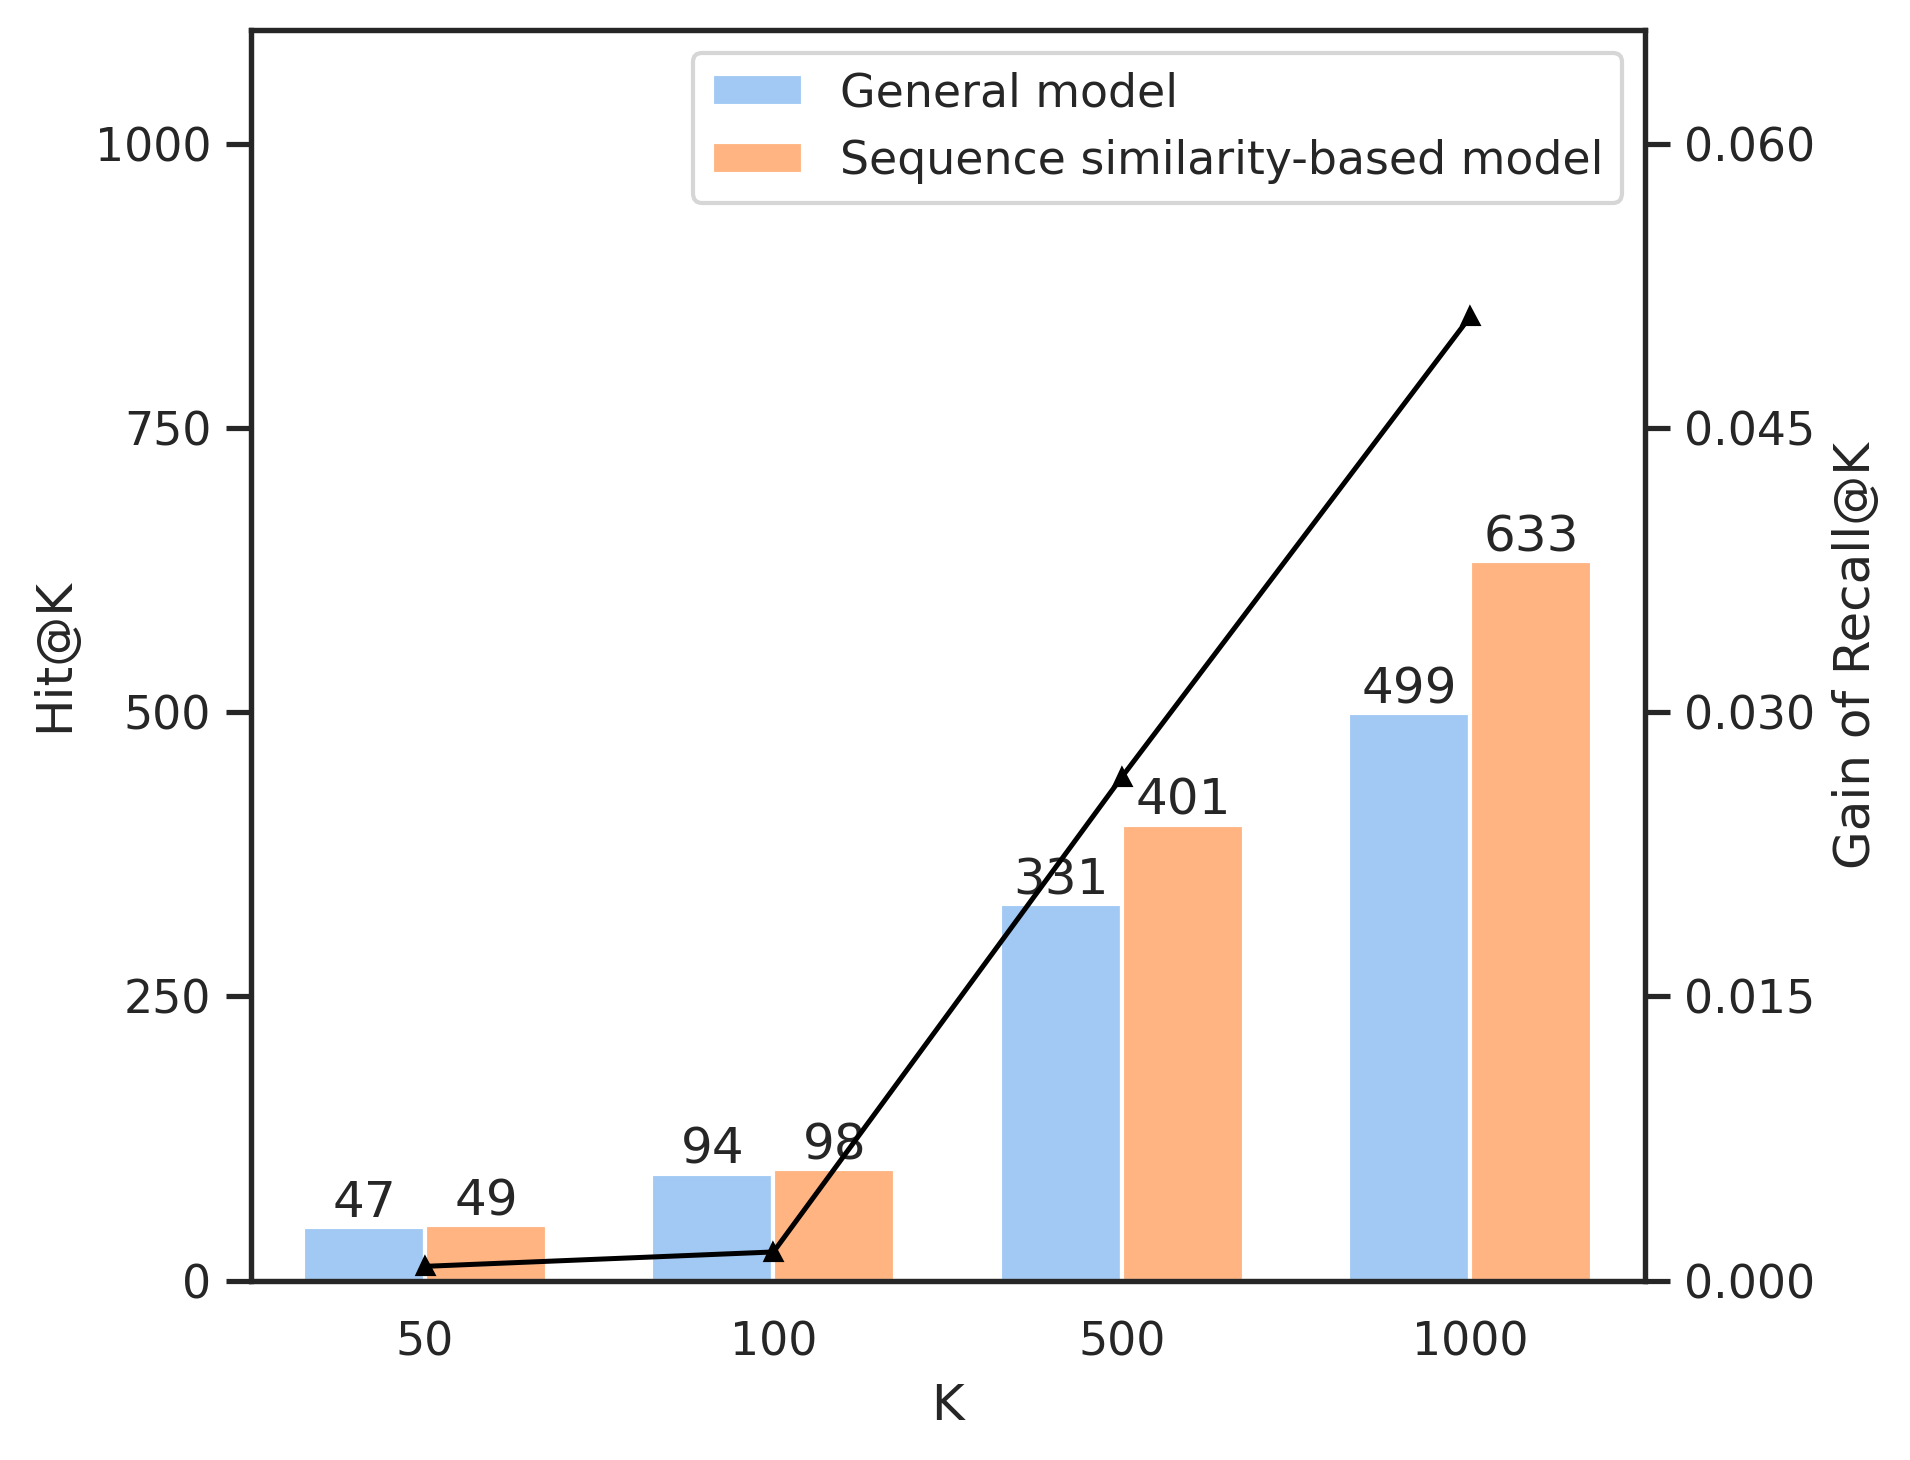

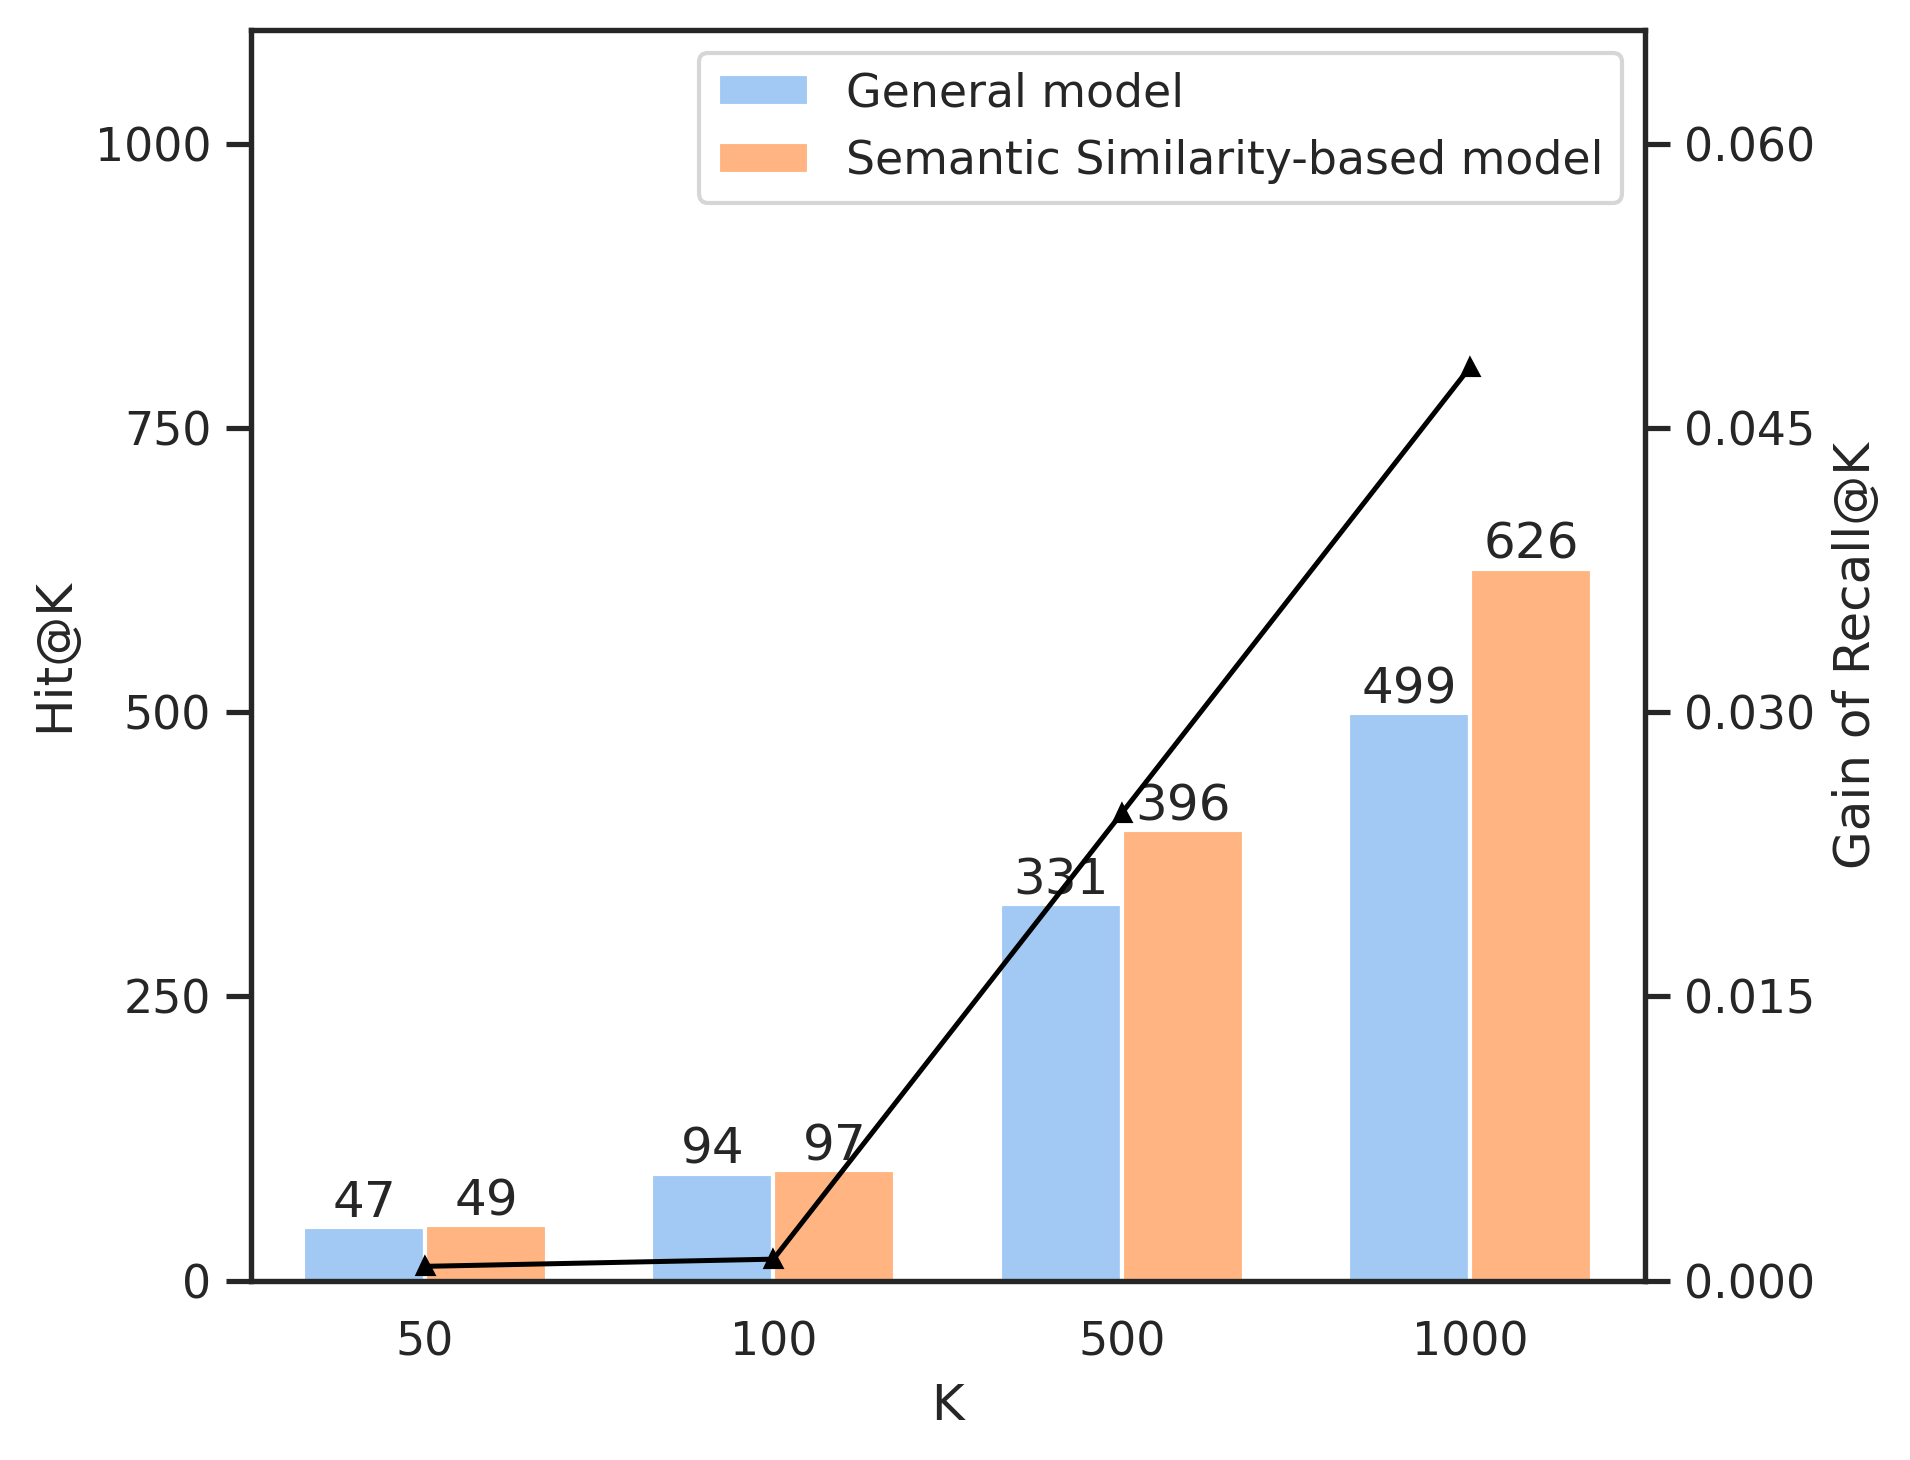

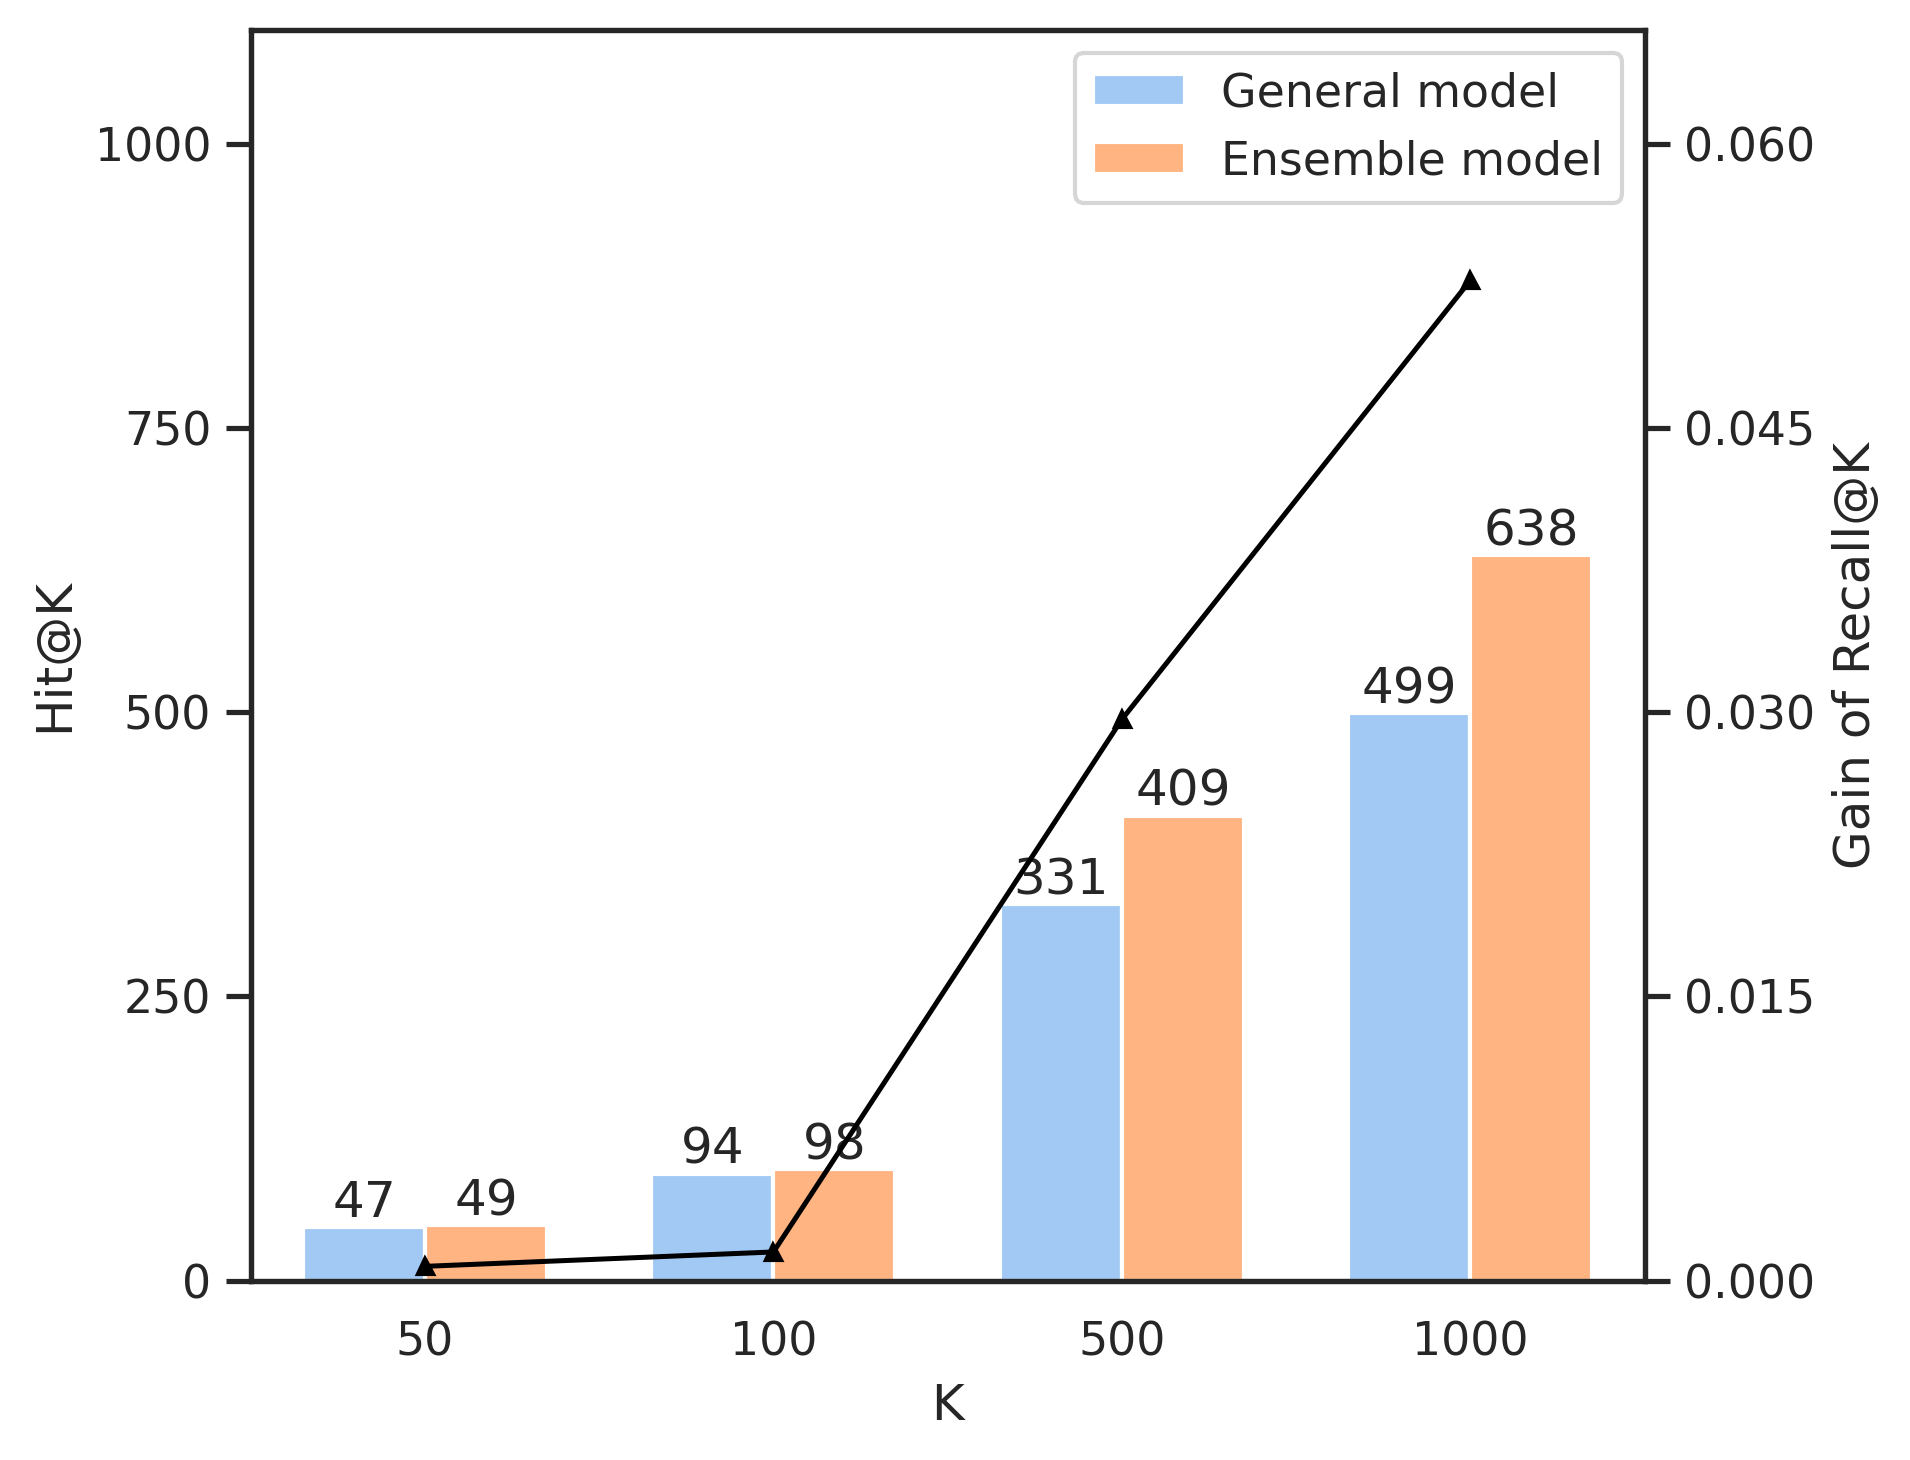

In [116]:
target_allele = "HLA-G*01:01"

datapath = "../fullranking_csvs/zeroshot_eg/"
res1 = pd.read_csv(datapath + "HPL-Pan/182mer_RN_ft_tape_cat_mean_3e-05_ep51.csv", index_col=0)
res4 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_G_seq_more_1e-05_ep13_G0101.csv", index_col=0)
res5 = pd.read_csv(datapath + "HPL-Cluster/182mer_RN_ft_tape_G_semantic_equal_1e-05_ep8_G0101.csv", index_col=0)
res6 = pd.read_csv(datapath + "HPL-Allele/182mer_RN_ft_tape_ensemble_G0101.csv", index_col=0)

model_name = ["General model",
              "Sequence similarity-based model",
              "Semantic Similarity-based model",
              "Ensemble model"]
bigtitle = "Performance gains of {} allele-specific models over general prediction model".format(target_allele)

sns.set(style="white", palette="pastel")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (6.5, 5)

res_dfs = [res4, res5, res6]

for ind, res in enumerate(res_dfs):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plot_part3(ax, res, res1, target_allele, chosen_topk=['50', '100', '500', '1000'])
    ax.legend([model_name[0], model_name[ind+1]])
    # plt.tight_layout(pad=1)
    plt.savefig("./pngs_final/part3_G0101_{}.png".format(ind), dpi=500, bbox_inches='tight')

---
Part 4

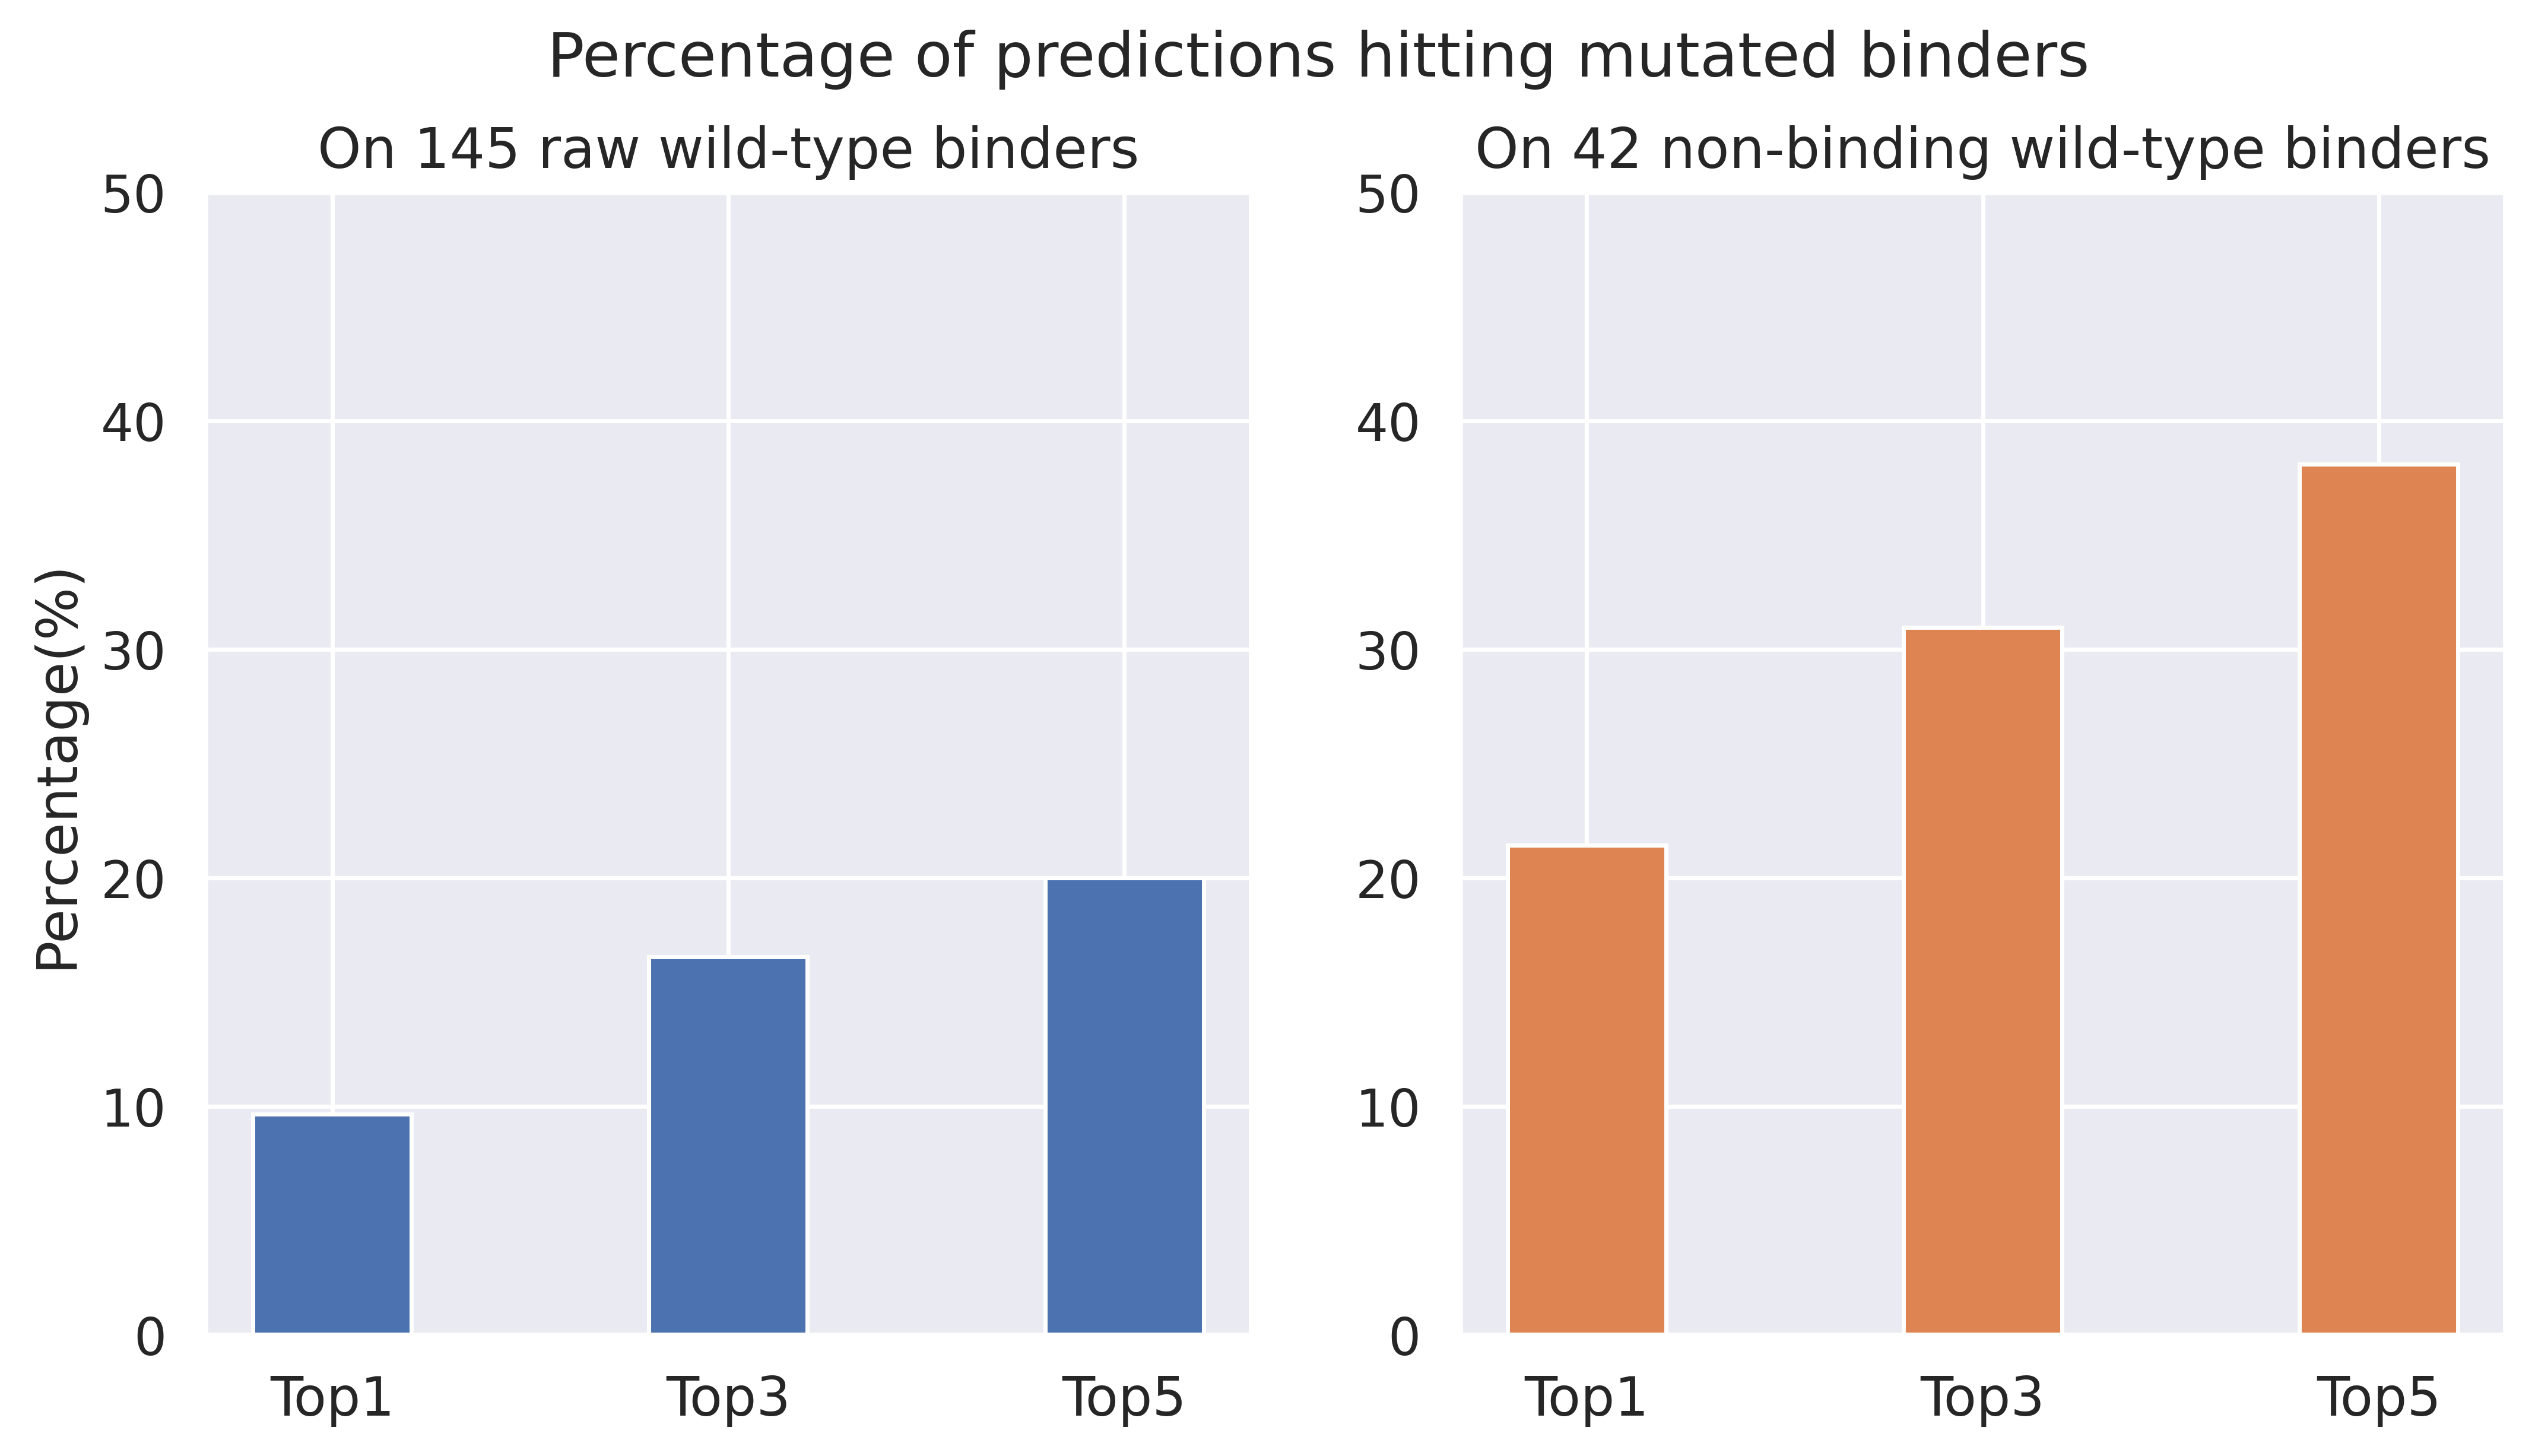

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

cell = ['Top1','Top3','Top5']
index = np.arange(len(cell))
total1 = 145
x1 = np.asarray([14, 24, 29])
total2 = 42
x2 = np.asarray([9, 13, 16])

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10.0, 5.0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2)
# fig, _ = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

ax2 = fig.add_subplot(gs[0, 0])
ax2.bar(cell, x1/total1*100, width=0.4)
ax2.set_title(f"On {total1} raw wild-type binders", fontsize=13.5)
ax2.set_ylabel("Percentage(%)", fontsize=13.5)
ax2.set_ylim([0, 50])
plt.yticks(fontsize=12.5)
plt.xticks(fontsize=13)

ax3 = fig.add_subplot(gs[0, 1])
ax3.bar(cell, x2/total2*100, color="#dd8452", width=0.4)
ax3.set_title(f"On {total2} non-binding wild-type binders", fontsize=13.5)
# ax3.set_ylabel("Percentage(%)")
ax3.set_ylim([0, 50])
plt.yticks(fontsize=12.5)
plt.xticks(fontsize=13)

# plt.tight_layout(pad=1.5)
plt.subplots_adjust(wspace=0.2, hspace=0.1)
fig.suptitle("Percentage of predictions hitting mutated binders",fontsize=15,x=0.5,y=0.99)

plt.savefig("./pngs_final/part4_1mutation.png", dpi=500, bbox_inches='tight')
plt.savefig("./svgs_final2/4-2_2.svg", format='svg', dpi=dpi, bbox_inches='tight')

/tmp/ipykernel_2463098/3554104214.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(cell,fontsize=14)
/tmp/ipykernel_2463098/3554104214.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(cell,fontsize=14)


<Figure size 4800x2400 with 0 Axes>

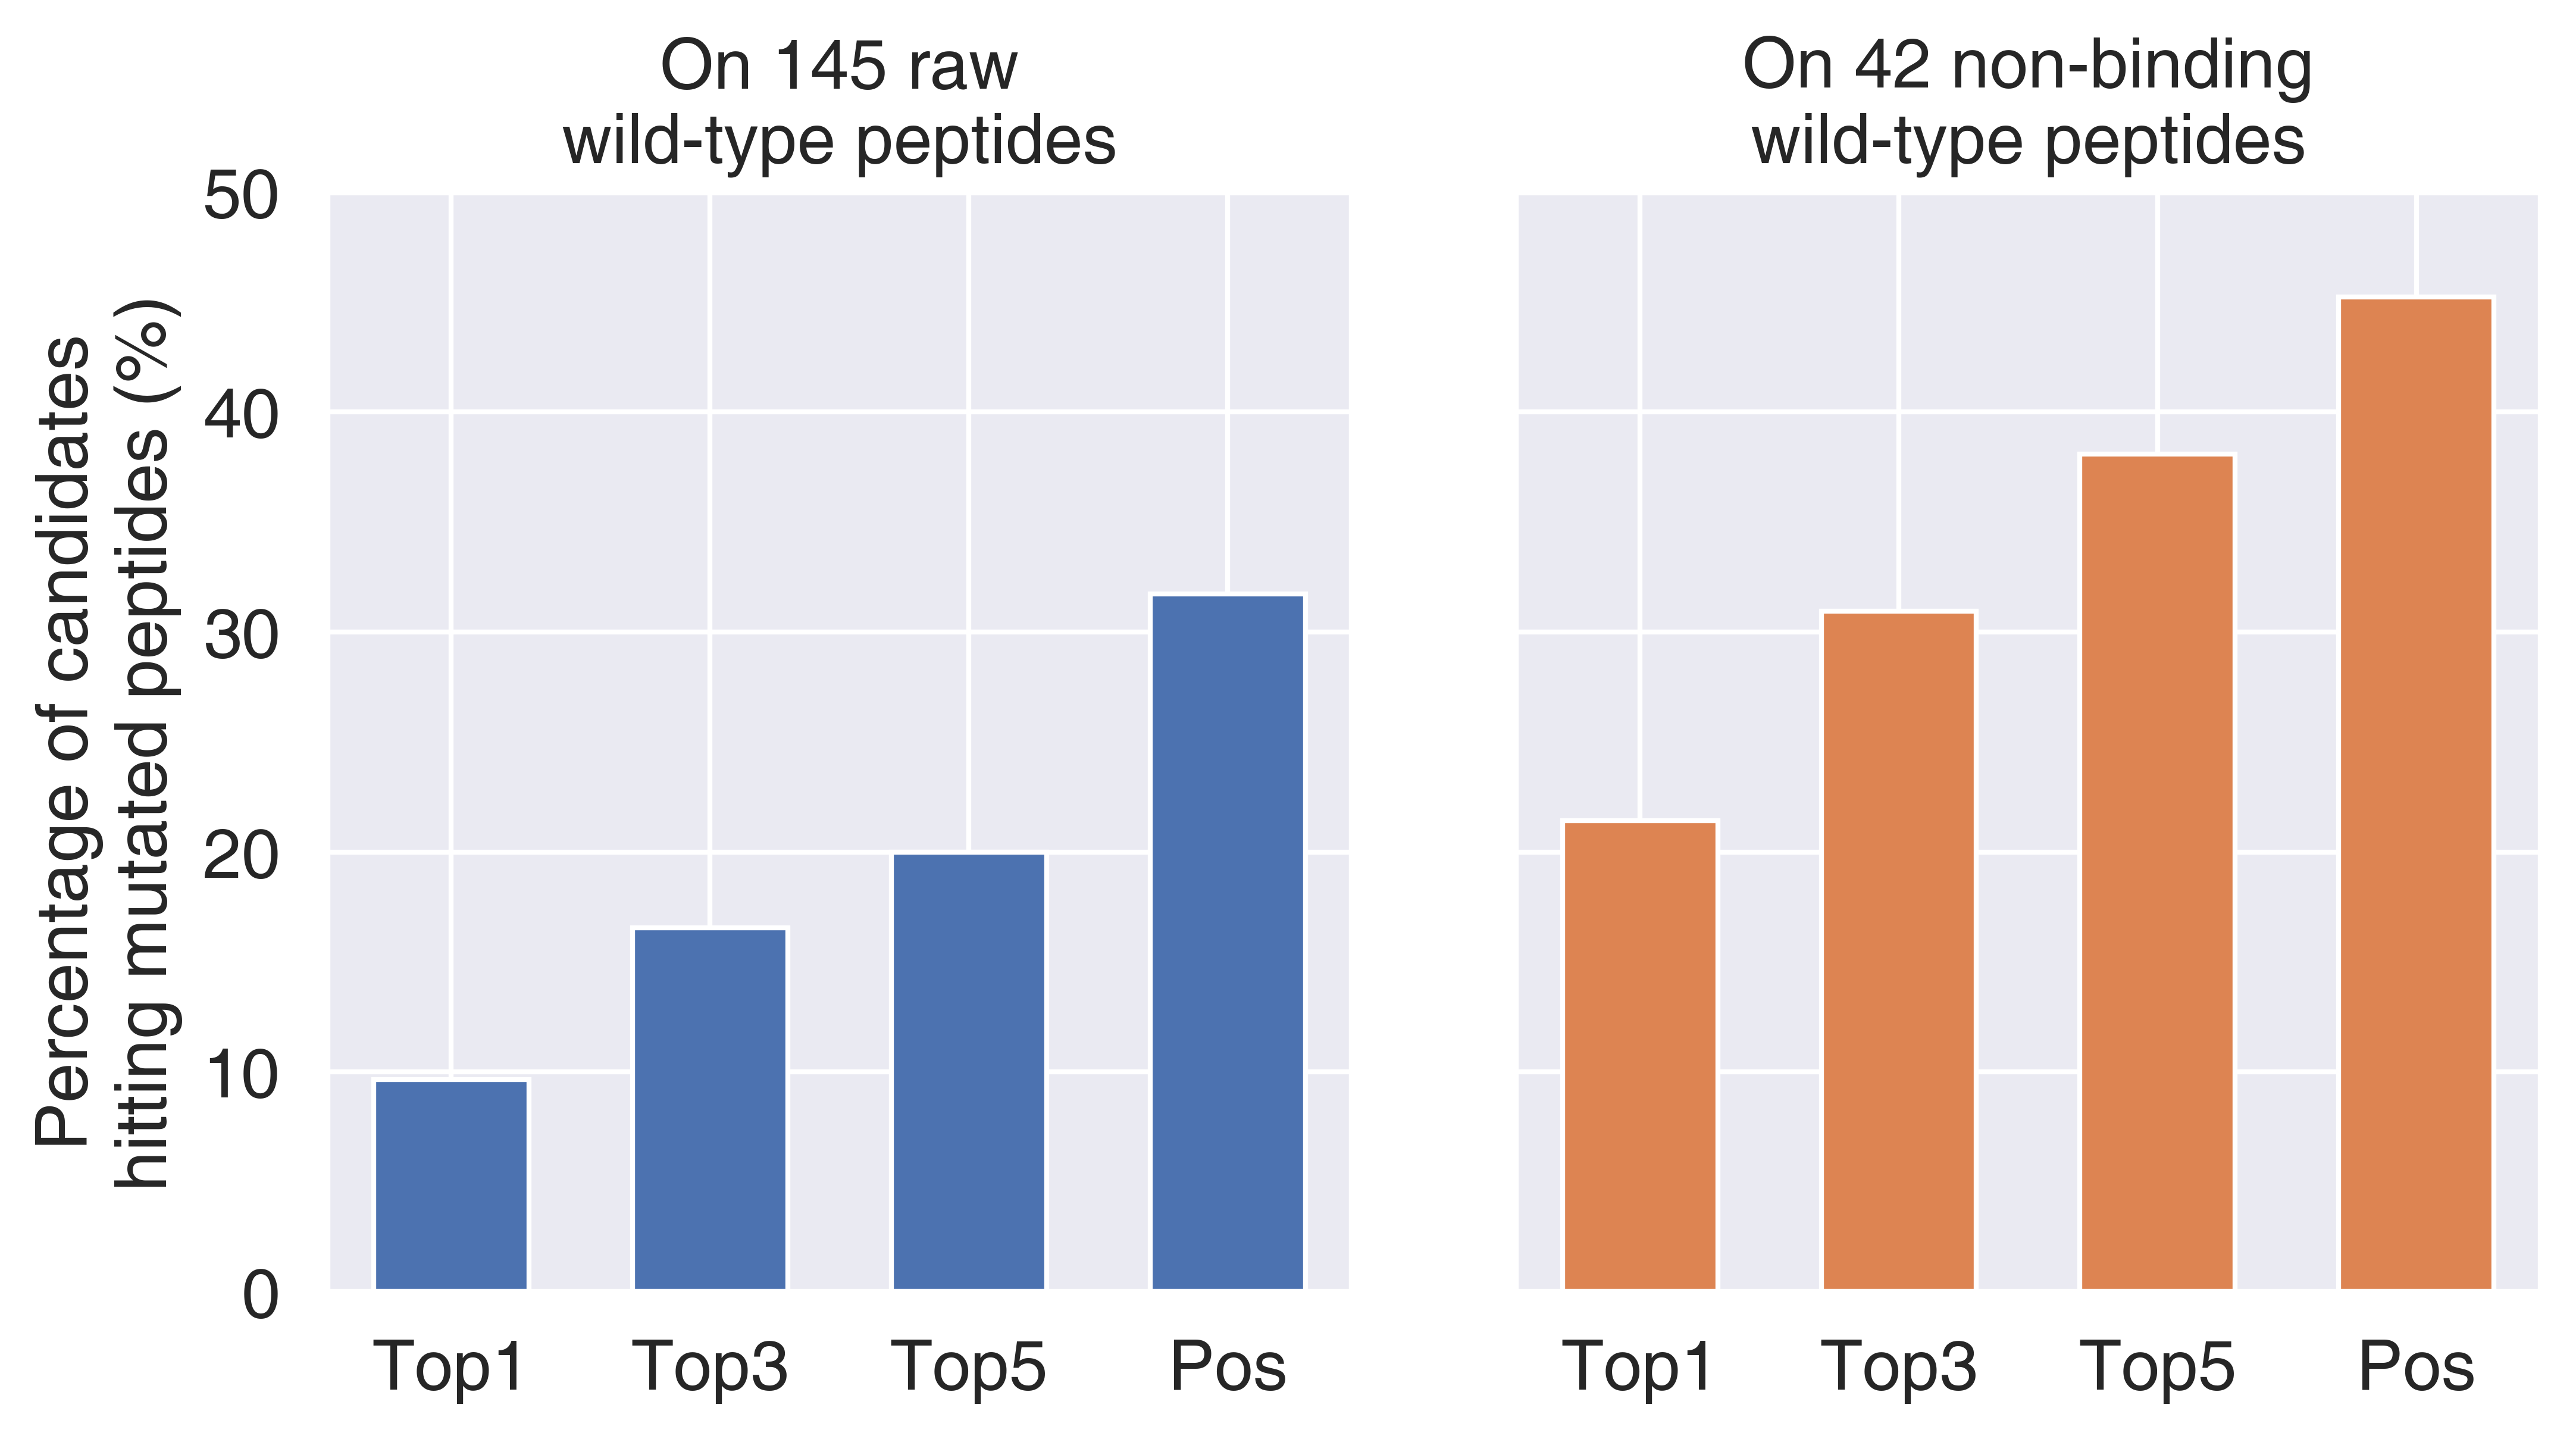

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

cell = ['Top1','Top3','Top5','Pos']
index = np.arange(len(cell))
total1 = 145
x1 = np.asarray([14, 24, 29, 46])
total2 = 42
x2 = np.asarray([9, 13, 16, 19])

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
# font = {'family': 'sans-serif',
#         'sans-serif': 'Helvetica'}
# plt.rc('font', **font)

fig = plt.figure()
fig, (ax2,ax3) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

ax2.bar(cell, x1/total1*100, width=0.6)
ax2.set_title(f"On {total1} raw\nwild-type peptides", fontsize=14)
ax2.set_ylabel("Percentage of candidates\nhitting mutated peptides (%)", fontsize=14.5)
ax2.set_ylim([0, 50])
ax2.set_yticks([0,10,20,30,40,50])
ax2.set_yticklabels([0,10,20,30,40,50],fontsize=14)
ax2.set_xticklabels(cell,fontsize=14)

ax3.bar(cell, x2/total2*100, color="#dd8452", width=0.6)
ax3.set_title(f"On {total2} non-binding\nwild-type peptides", fontsize=14)
ax3.set_xticklabels(cell,fontsize=14)

plt.subplots_adjust(wspace=0.16)
plt.savefig("./pngs_final3/part4_1mutation.png", dpi=dpi, bbox_inches='tight')
plt.savefig("./svgs_final2/4-2_2.svg", format='svg', dpi=dpi, bbox_inches='tight')

In [6]:
matplotlib.matplotlib_fname()

'/home/lujd/miniconda3/envs/phla/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [7]:
matplotlib.get_cachedir()

'/home/lujd/.cache/matplotlib'